In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import glob
import os
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ParaSet

In [ ]:
# Prompt user to upload multiple TXT files
uploaded = files.upload()

# Initialize a list to hold dataframes
dfs = []

for filename, filecontent in uploaded.items():
    # Extract Hull_id from filename (first 6 digits before '_')
    hull_id = filename.split('_')[0]

    # Read the file into a dataframe (each line is a parameter)
    df = pd.read_csv(io.StringIO(filecontent.decode('utf-8')), header=None, names=['value'])

    # Transpose so parameters become columns
    df = df.T
    df.columns = [f'para{i+1}' for i in range(df.shape[1])]

    # Add Hull_id as first column
    df.insert(0, 'Hull_id', hull_id)

    # Append to list
    dfs.append(df)

# Concatenate all dataframes into one
ParaSet_df = pd.concat(dfs, ignore_index=True)



'''
# Optional: Save combined dataframe as CSV for download
final_df.to_csv('combined_hull_parameters.csv', index=False)
files.download('combined_hull_parameters.csv')
'''

In [ ]:
import pandas as pd
import glob
from io import StringIO
from google.colab import drive

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Path to your ParaSet folder
folder_path = '/content/drive/My Drive/ARIA/ParaSet/*.txt'

# 3️⃣ Initialize list to hold all dataframes
dfs = []

# 4️⃣ Loop through all txt files in the folder
for filepath in glob.glob(folder_path):
    filename = filepath.split('/')[-1]  # Get file name
    hull_id = filename.split('_')[0]    # Extract first 6 digits as hull_id

    # Read file into dataframe
    df = pd.read_csv(filepath, header=None, names=['value'])

    # Transpose so parameters become columns
    df = df.T
    df.columns = [f'para{i+1}' for i in range(df.shape[1])]

    # Add Hull_id as first column
    df.insert(0, 'Hull_id', hull_id)

    # Append to list
    dfs.append(df)

# 5️⃣ Concatenate all dataframes
ParaSet_df = pd.concat(dfs, ignore_index=True)
# Sort rows by Hull_id (numerically)
# Create a numeric copy for sorting
ParaSet_df['Hull_sort'] = ParaSet_df['Hull_id'].astype(int)

# Sort using numeric copy
ParaSet_df = ParaSet_df.sort_values(by='Hull_sort').reset_index(drop=True)

# Drop the helper column and ensure Hull_id stays zero-padded
ParaSet_df['Hull_id'] = ParaSet_df['Hull_id'].apply(lambda x: f"{int(x):06d}")
ParaSet_df = ParaSet_df.drop(columns=['Hull_sort'])



# 6️⃣ Optional: Save combined dataframe as CSV
ParaSet_df.to_csv('/content/drive/My Drive/ARIA/ParaSet.csv', index=False)

# ✅ Display the final dataframe
ParaSet_df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hull_id,para1,para2,para3,para4,para5,para6,para7,para8,para9,...,para36,para37,para38,para39,para40,para41,para42,para43,para44,para45
0,000000,20.0,0.357161,0.255,0.225,0.12,0.949797,0.5125,0.165346,12.75,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
1,000001,20.0,0.357161,0.345,0.225,0.12,0.949797,0.5125,0.165346,12.75,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
2,000002,20.0,0.357161,0.345,0.225,0.12,0.949797,0.5125,0.210346,17.25,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
3,000003,20.0,0.357161,0.345,0.225,0.12,0.949797,0.5125,0.165346,17.25,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4,000004,20.0,0.357161,0.255,0.225,0.12,0.949797,0.5125,0.210346,12.75,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
5,000005,20.0,0.357161,0.255,0.225,0.12,0.949797,0.5125,0.165346,17.25,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
6,000006,20.0,0.442161,0.345,0.225,0.12,0.949797,0.5125,0.165346,17.25,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
7,000007,20.0,0.442161,0.255,0.225,0.12,0.949797,0.5125,0.210346,12.75,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
8,000008,20.0,0.357161,0.255,0.225,0.12,0.949797,0.5125,0.210346,12.75,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
9,000009,20.0,0.442161,0.345,0.225,0.12,0.949797,0.5125,0.165346,12.75,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208


In [ ]:
ParaSet_df.to_numpy()

array([['000000', 20.0, 0.3571613, 0.255, 0.225, 0.12, 0.9497972, 0.5125,
        0.1653464, 12.75, 0.06, 0.3, 0.0, -0.65, 0.0, 0.55, -2.054873,
        1.584406, 0.0, 0.2, 0.000666911, 0.0, 0.0, 0.0, 0.2, 0.05, 0.4,
        0.4, 0.03867331, 0.1901826, 0.02941955, 0.3613378, 0.0, 0.0,
        0.085729, 0.9996717, 0.5005726, -0.9999611, 0.1545922, 0.867,
        0.001, 0.38, 0.5, 0.01, 0.0, 0.3042085],
       ['000001', 20.0, 0.3571613, 0.345, 0.225, 0.12, 0.9497972, 0.5125,
        0.1653464, 12.75, 0.06, 0.1, 0.0, -0.65, 0.1, 0.55, -1.254873,
        1.584406, 0.0, 0.2, 0.000666911, 0.0, 0.0, 0.0, 0.2, 0.05, -0.4,
        -0.4, 6.038673, 0.1901826, 0.02941955, 0.5613378, 0.0, 0.0,
        0.085729, 0.9996717, 0.5005726, -0.9999611, 0.1545922, 0.867,
        0.001, 0.38, 0.5, 0.01, 0.0, 0.3042085],
       ['000002', 20.0, 0.3571613, 0.345, 0.225, 0.12, 0.9497972, 0.5125,
        0.2103464, 17.25, 0.06, 0.1, 0.0, -0.65, 0.0, 0.55, -1.254873,
        0.784406, 0.0, 0.2, 0.000666911, 0.0,

Displacement

In [ ]:
# Prompt user to upload multiple Displacement TXT files
uploaded = files.upload()

# Initialize a list to hold dataframes
dfs = []

for filename, filecontent in uploaded.items():
    # Extract Hull_id from filename (first 6 digits before '_')
    hull_id = filename.split('_')[0]

    # Read the file into a dataframe (assumes CSV format inside)
    df = pd.read_csv(io.StringIO(filecontent.decode('utf-8')))

    # Add Hull_id as first column
    df.insert(0, 'Hull_id', hull_id)

    # Append to list
    dfs.append(df)

# Concatenate all dataframes into one
Displacement_df = pd.concat(dfs, ignore_index=True)


Displacement_df.to_csv('/content/drive/My Drive/ARIA/Displacement.csv', index=False)

'''
# Optional: Save combined dataframe as CSV for download
final_df.to_csv('combined_displacement.csv', index=False)
files.download('combined_displacement.csv')
'''

Saving 000000_c_20_4.5_2.4_1.23_Displacement.txt to 000000_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000001_c_20_4.5_2.4_1.23_Displacement.txt to 000001_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000002_c_20_4.5_2.4_1.23_Displacement.txt to 000002_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000003_c_20_4.5_2.4_1.23_Displacement.txt to 000003_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000004_c_20_4.5_2.4_1.23_Displacement.txt to 000004_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000005_c_20_4.5_2.4_1.23_Displacement.txt to 000005_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000006_c_20_4.5_2.4_1.23_Displacement.txt to 000006_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000007_c_20_4.5_2.4_1.23_Displacement.txt to 000007_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000008_c_20_4.5_2.4_1.23_Displacement.txt to 000008_c_20_4.5_2.4_1.23_Displacement (1).txt
Saving 000009_c_20_4.5_2.4_1.23_Displacement.txt to 000009_c_20_4.5_2.4_1.23_Displacement (1).txt


"\n# Optional: Save combined dataframe as CSV for download\nfinal_df.to_csv('combined_displacement.csv', index=False)\nfiles.download('combined_displacement.csv')\n"

In [ ]:
"""
import pandas as pd
import glob
from google.colab import drive

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Path to Displacement folder
folder_path = '/content/drive/My Drive/ARIA/Displacement/*.txt'

# 3️⃣ Initialize list to hold dataframes
dfs = []

# 4️⃣ Loop through each file
for filepath in glob.glob(folder_path):
    filename = filepath.split('/')[-1]
    hull_id = filename.split('_')[0]  # first 6 digits

    # Read the file (CSV format inside)
    df = pd.read_csv(filepath, header=None)

    # Add Hull_id as first column
    df.insert(0, 'Hull_id', hull_id)

    dfs.append(df)

# 5️⃣ Concatenate all dataframes
Displacement_df = pd.concat(dfs, ignore_index=True)

# 6️⃣ Sort numerically but keep Hull_id zero-padded
Displacement_df['Hull_sort'] = Displacement_df['Hull_id'].astype(int)
Displacement_df = Displacement_df.sort_values(by='Hull_sort').reset_index(drop=True)
Displacement_df['Hull_id'] = Displacement_df['Hull_id'].apply(lambda x: f"{int(x):06d}")
Displacement_df = Displacement_df.drop(columns=['Hull_sort'])

# 7️⃣ Save combined dataframe to Google Drive
Displacement_df.to_csv('/content/drive/My Drive/ARIA/Displacement.csv', index=False)

# ✅ Display first 10 rows
Displacement_df
"""

'\nimport pandas as pd\nimport glob\nfrom google.colab import drive\n\n# 1️⃣ Mount Google Drive\ndrive.mount(\'/content/drive\')\n\n# 2️⃣ Path to Displacement folder\nfolder_path = \'/content/drive/My Drive/ARIA/Displacement/*.txt\'\n\n# 3️⃣ Initialize list to hold dataframes\ndfs = []\n\n# 4️⃣ Loop through each file\nfor filepath in glob.glob(folder_path):\n    filename = filepath.split(\'/\')[-1]\n    hull_id = filename.split(\'_\')[0]  # first 6 digits\n    \n    # Read the file (CSV format inside)\n    df = pd.read_csv(filepath, header=None)\n    \n    # Add Hull_id as first column\n    df.insert(0, \'Hull_id\', hull_id)\n    \n    dfs.append(df)\n\n# 5️⃣ Concatenate all dataframes\nDisplacement_df = pd.concat(dfs, ignore_index=True)\n\n# 6️⃣ Sort numerically but keep Hull_id zero-padded\nDisplacement_df[\'Hull_sort\'] = Displacement_df[\'Hull_id\'].astype(int)\nDisplacement_df = Displacement_df.sort_values(by=\'Hull_sort\').reset_index(drop=True)\nDisplacement_df[\'Hull_id\'] = Di

In [ ]:
Displacement_df

,Hull_id,Draft(m),LengthWL(m),BeamWLMax(m),DraftSubmergedMax(m),Displacement(t)
0,000000,0.9840,18.304311,4.263965,0.9840,39.229349
1,000000,1.0795,18.418674,4.279883,1.0795,45.403319
2,000000,1.4715,18.888103,4.345227,1.4715,71.868352
3,000000,1.3241,18.711589,4.320656,1.3241,61.692091
4,000000,1.4760,18.893491,4.345977,1.4760,72.183583
5,000001,0.9840,18.304311,4.266961,0.9840,39.916943
6,000001,1.4123,18.817210,4.337449,1.4123,68.209219
7,000001,1.0083,18.333411,4.270960,1.0083,41.483962
8,000001,1.3133,18.698655,4.321155,1.3133,61.531974
9,000001,1.4760,18.893491,4.347932,1.4760,72.554754


Resistance

In [ ]:
# Upload multiple Resistance TXT files
uploaded = files.upload()

# Initialize a list to hold dataframes
dfs = []

for filename in uploaded.keys():
    # Extract Hull_id from filename
    hull_id = filename.split('_')[0]

    # Read file, skip first row (header)
    temp_df = pd.read_csv(filename, skiprows=1, header=None)

    # Add Hull_id as first column
    temp_df.insert(0, 'Hull_id', hull_id)

    dfs.append(temp_df)

# Combine all into one dataframe
Resistance_df = pd.concat(dfs, ignore_index=True)

# Set column names
Resistance_df.columns = ["Hull_id", "Draft(m)", "WaveH(m)", "Speed(kt)", "DragBareHull(kN)", "DragSeas(kN)", "DragTotal(kN)"]

'''
# Optional: Save and download
Resistance_df.to_csv('Resistance_combined.csv', index=False)
files.download('Resistance_combined.csv')
'''

Saving 000000_c_20_4.5_2.4_1.23_resistance.txt to 000000_c_20_4.5_2.4_1.23_resistance.txt
Saving 000001_c_20_4.5_2.4_1.23_resistance.txt to 000001_c_20_4.5_2.4_1.23_resistance.txt
Saving 000002_c_20_4.5_2.4_1.23_resistance.txt to 000002_c_20_4.5_2.4_1.23_resistance.txt
Saving 000003_c_20_4.5_2.4_1.23_resistance.txt to 000003_c_20_4.5_2.4_1.23_resistance.txt
Saving 000004_c_20_4.5_2.4_1.23_resistance.txt to 000004_c_20_4.5_2.4_1.23_resistance.txt
Saving 000005_c_20_4.5_2.4_1.23_resistance.txt to 000005_c_20_4.5_2.4_1.23_resistance.txt
Saving 000006_c_20_4.5_2.4_1.23_resistance.txt to 000006_c_20_4.5_2.4_1.23_resistance.txt
Saving 000007_c_20_4.5_2.4_1.23_resistance.txt to 000007_c_20_4.5_2.4_1.23_resistance.txt
Saving 000008_c_20_4.5_2.4_1.23_resistance.txt to 000008_c_20_4.5_2.4_1.23_resistance.txt
Saving 000009_c_20_4.5_2.4_1.23_resistance.txt to 000009_c_20_4.5_2.4_1.23_resistance.txt


"\n# Optional: Save and download\nResistance_df.to_csv('Resistance_combined.csv', index=False)\nfiles.download('Resistance_combined.csv')\n"

In [ ]:
Resistance_df

,Hull_id,Draft(m),WaveH(m),Speed(kt),DragBareHull(kN),DragSeas(kN),DragTotal(kN)
0,000000,0.984,0.06,2.0,0.14,0.15,0.29
1,000000,0.984,0.06,4.0,0.59,0.31,0.90
2,000000,0.984,0.06,5.0,1.00,0.39,1.39
3,000000,0.984,0.06,6.0,1.62,0.46,2.08
4,000000,0.984,0.06,7.0,2.55,0.54,3.09
...,...,...,...,...,...,...,...
4745,000009,1.476,2.50,17.0,68.24,20.03,88.27
4746,000009,1.476,2.50,17.5,70.54,20.62,91.16
4747,000009,1.476,2.50,18.0,72.49,21.21,93.69
4748,000009,1.476,2.50,19.0,75.56,22.39,97.95


In [ ]:
Resistance_df.to_csv('/content/drive/My Drive/ARIA/Resistance.csv', index=False)

In [ ]:
# Optional: Save to CSV and offer download
Resistance_df.to_csv("combined_resistance_data.csv", index=False)
files.download("combined_resistance_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ---- STEP 1: Reorder and subset Resistance_df ----
Resistance_subset = Resistance_df[["Hull_id", "DragTotal(kN)", "Speed(kt)", "WaveH(m)", "Draft(m)"]]

# ---- STEP 2: Reorder and subset Displacement_df ----
Displacement_subset = Displacement_df[["Hull_id", "Draft(m)", "Displacement(t)"]]

# ---- STEP 3: Merge Resistance and Displacement on (Hull_id, Draft(m)) ----
merged_df = pd.merge(
    Resistance_subset,
    Displacement_subset,
    on=["Hull_id", "Draft(m)"],
    how="left"  # Keep all rows from Resistance_subset
)

# ---- STEP 4: Merge ParaSet_df on Hull_id ----
final_df = pd.merge(
    merged_df,
    ParaSet_df,
    on="Hull_id",
    how="left"  # Keep all rows
)

# ---- STEP 5: Fix bad string values ----
#final_df['para1'] = 20.0

# ---- STEP 6: Confirm replacement worked ----
if '2.000000e+01.1' not in final_df.values:
    print("✅ All occurrences of '2.000000e+01.1' replaced with 20.00000")
else:
    print("⚠️ Some occurrences of '2.000000e+01.1' remain")

# ---- STEP 7: Check final shape ----
print(f"Final merged DataFrame shape: {final_df.shape}")  # Should be (4750, 51)

'''
# ---- STEP 8: Save to CSV (optional) ----
final_df.to_csv("Final_Merged_Hull_Data.csv", index=False)
files.download("Final_Merged_Hull_Data.csv")
'''

✅ All occurrences of '2.000000e+01.1' replaced with 20.00000
Final merged DataFrame shape: (4750, 51)


'\n# ---- STEP 8: Save to CSV (optional) ----\nfinal_df.to_csv("Final_Merged_Hull_Data.csv", index=False)\nfiles.download("Final_Merged_Hull_Data.csv")\n'

In [ ]:
final_df

,Hull_id,DragTotal(kN),Speed(kt),WaveH(m),Draft(m),Displacement(t),para1,para2,para3,para4,...,para36,para37,para38,para39,para40,para41,para42,para43,para44,para45
0,000000,0.29,2.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
1,000000,0.90,4.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
2,000000,1.39,5.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
3,000000,2.08,6.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4,000000,3.09,7.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,000009,88.27,17.0,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4746,000009,91.16,17.5,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4747,000009,93.69,18.0,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4748,000009,97.95,19.0,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208


In [ ]:
final_df.para1.unique()

array([20.])

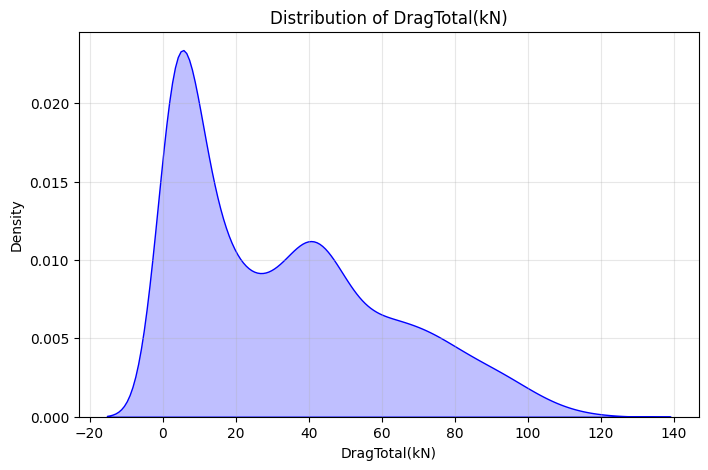

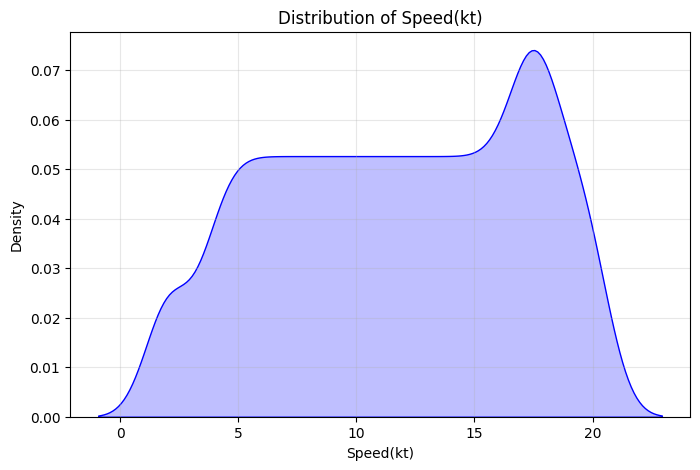

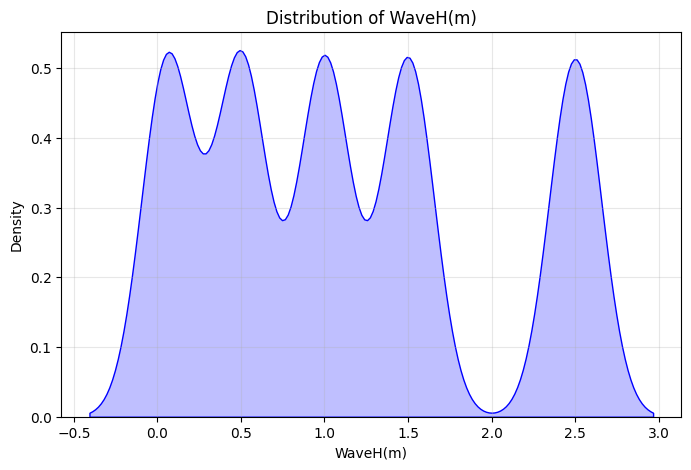

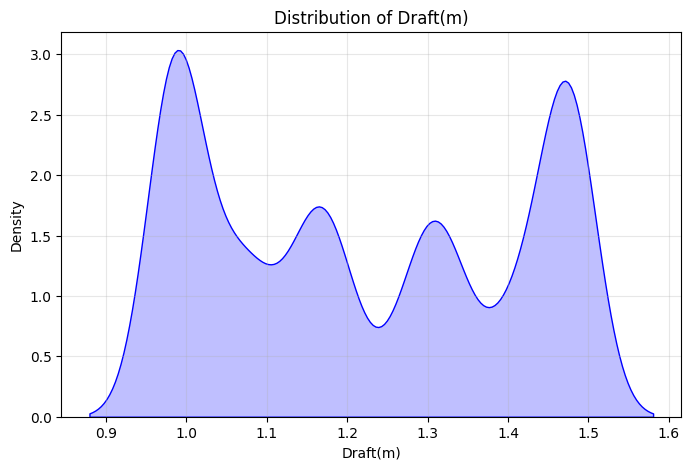

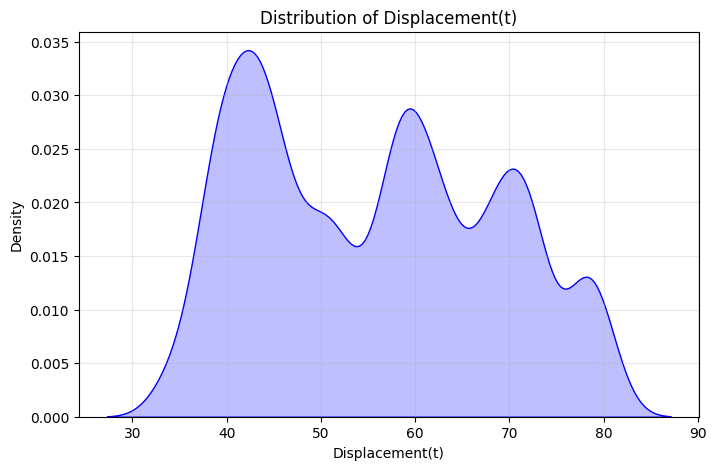

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


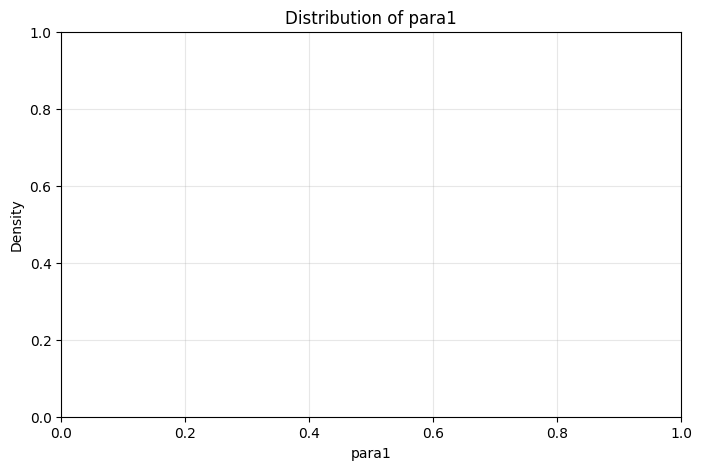

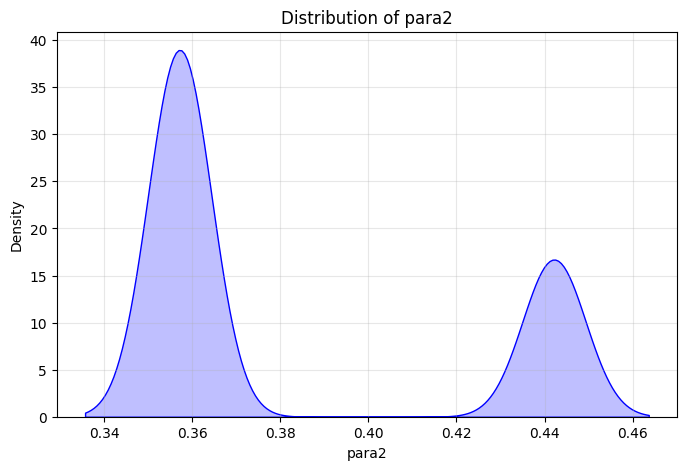

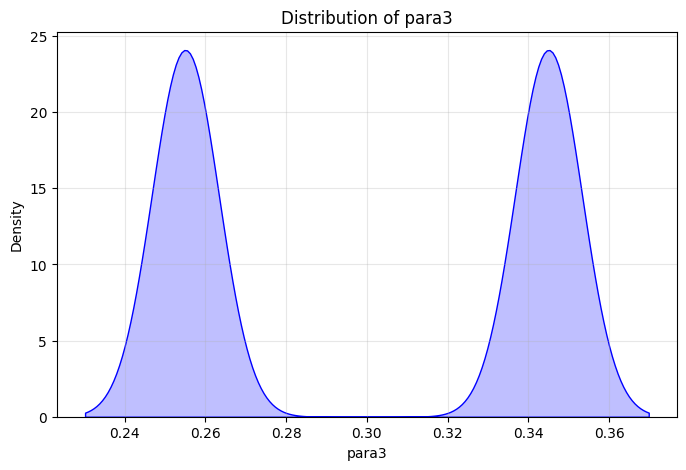

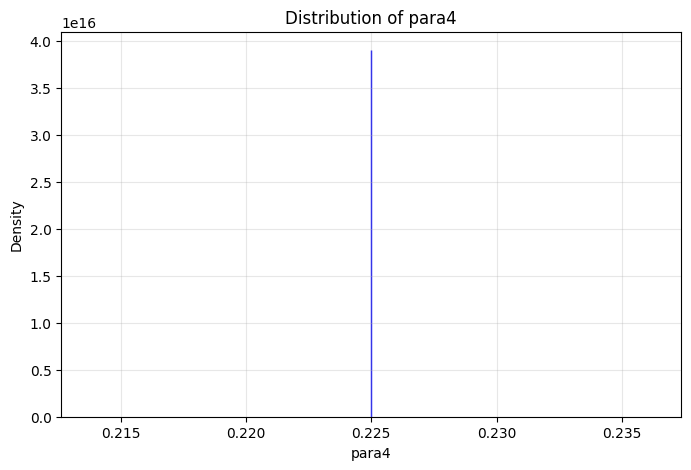

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


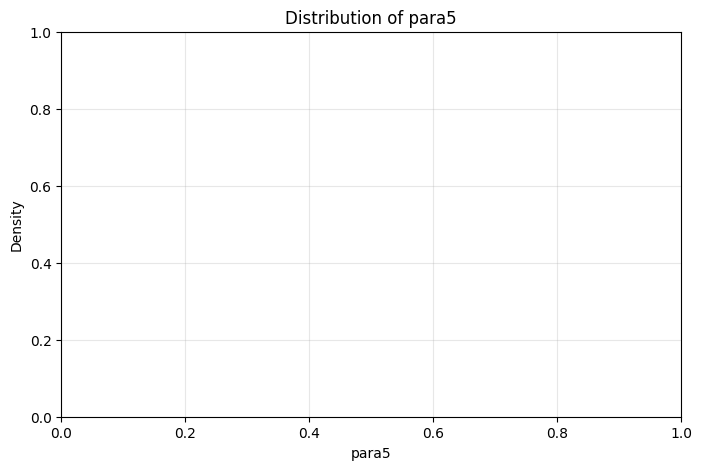

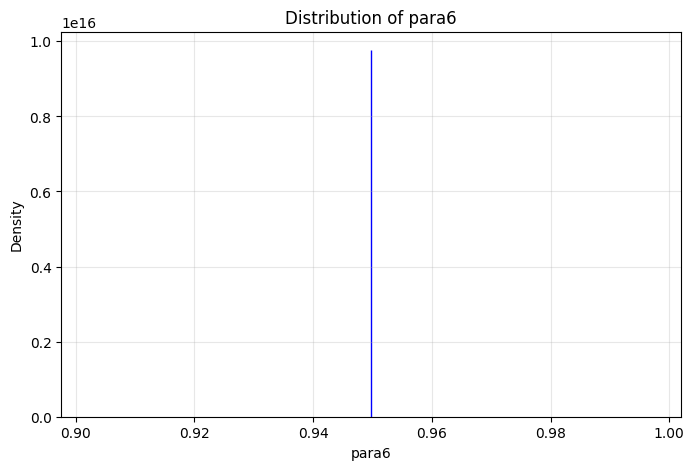

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


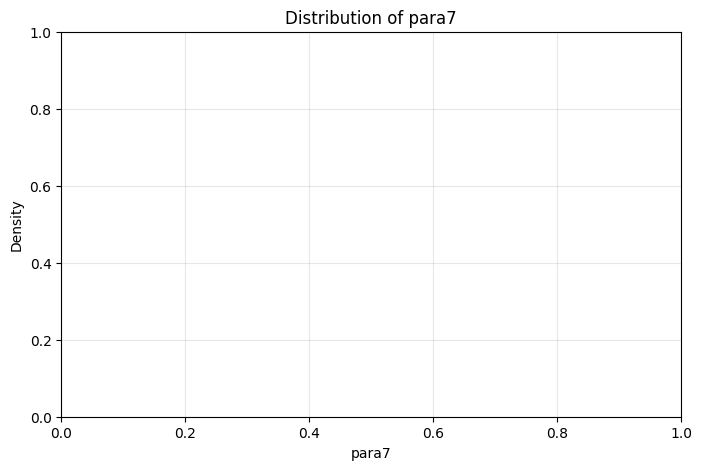

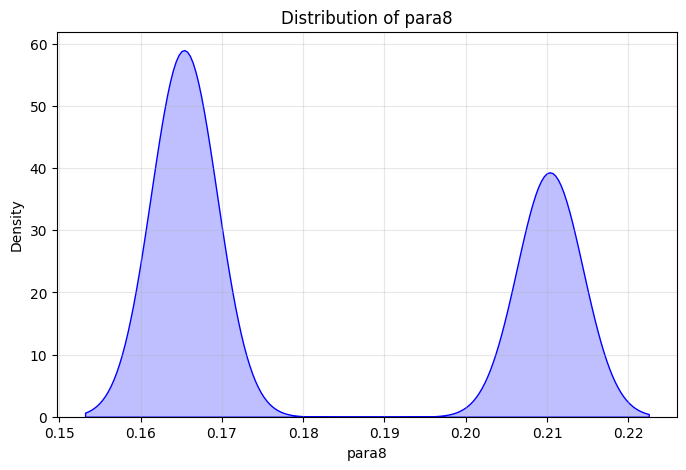

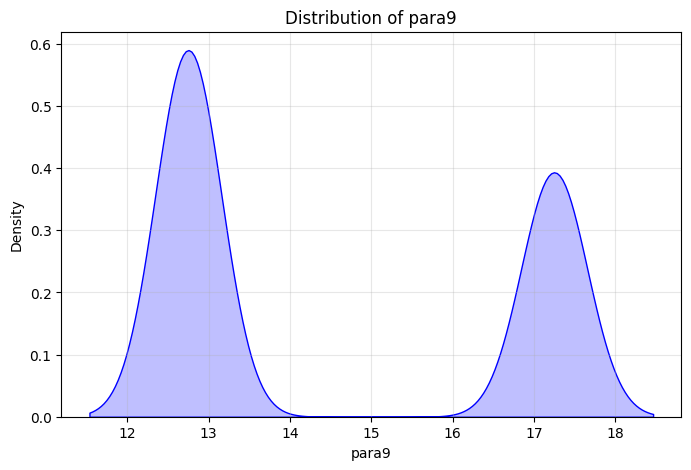

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


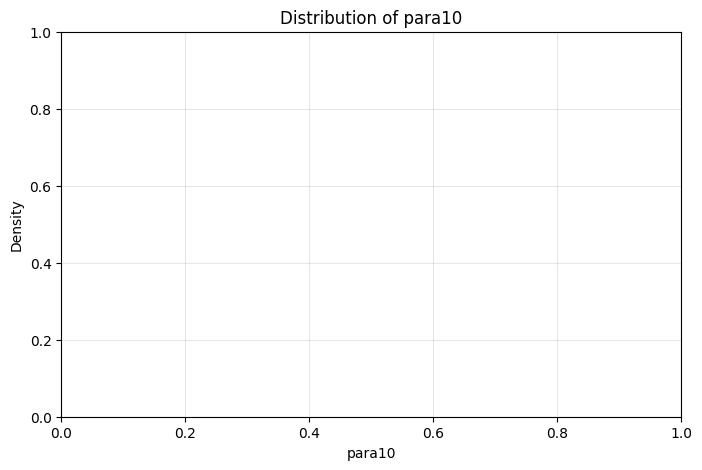

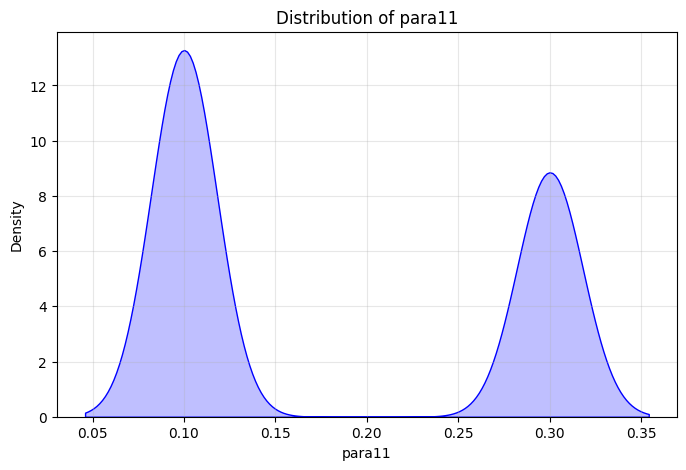

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


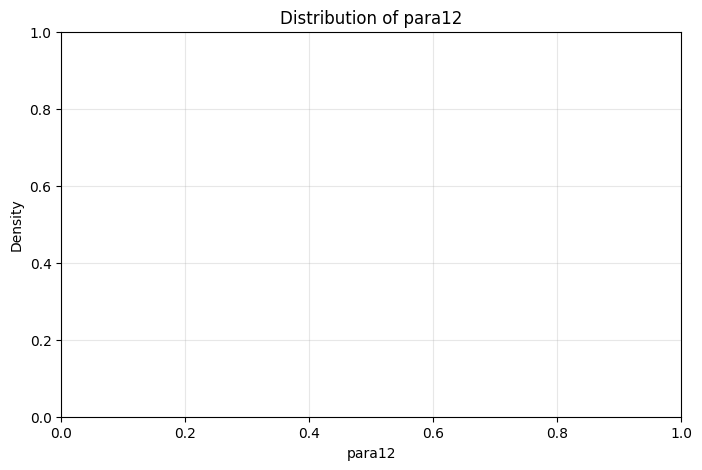

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


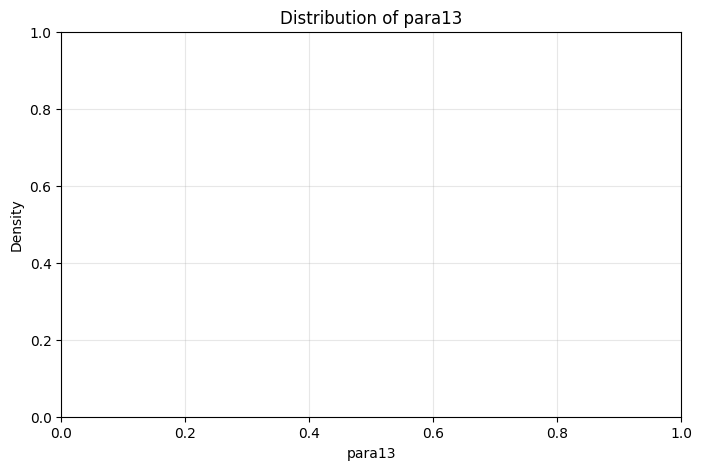

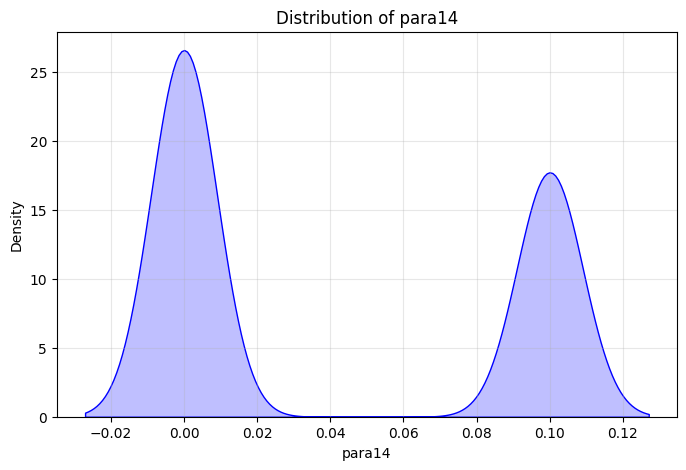

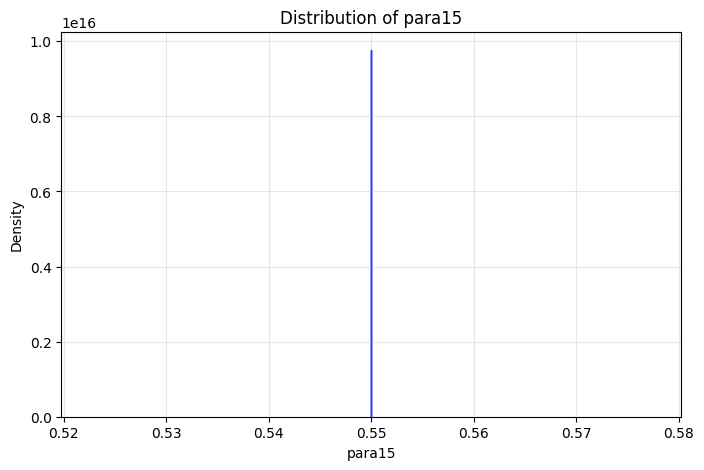

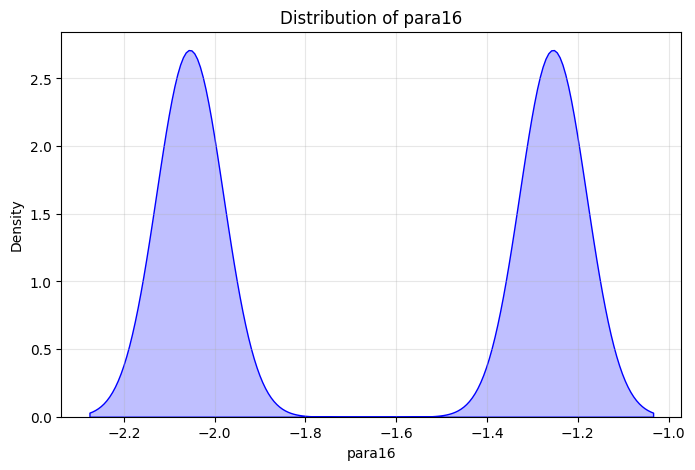

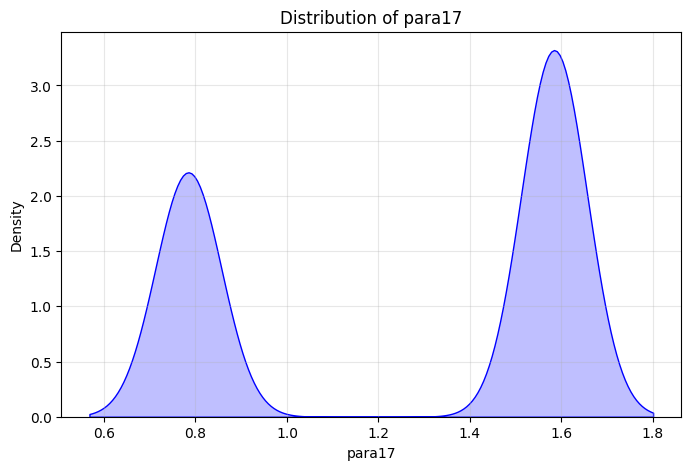

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


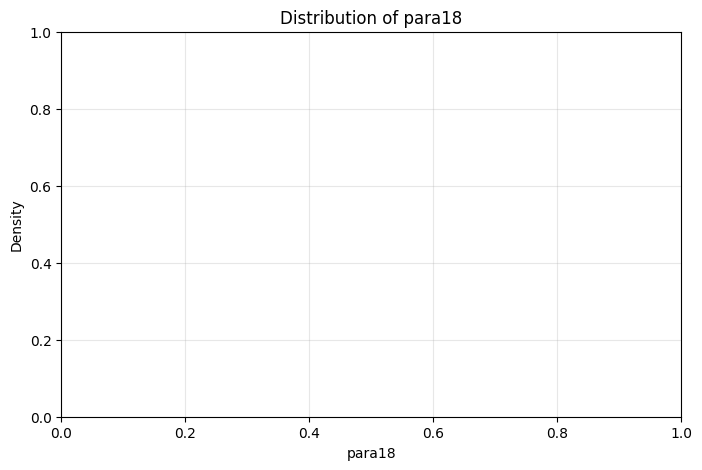

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


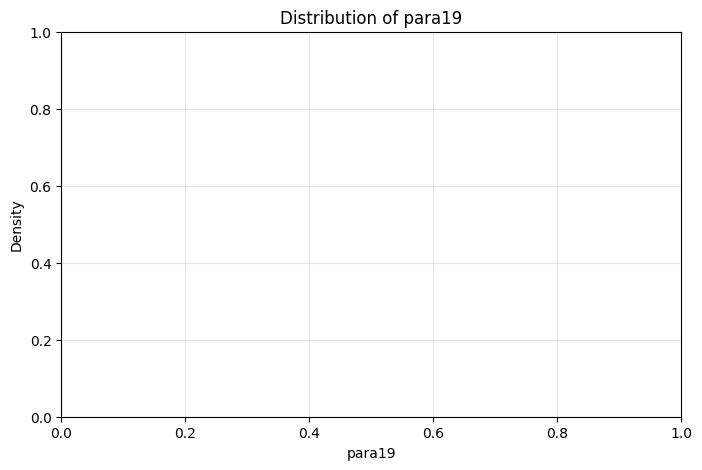

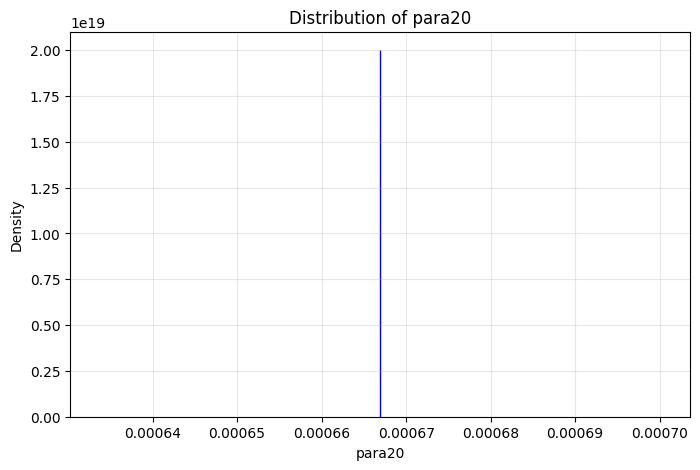

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


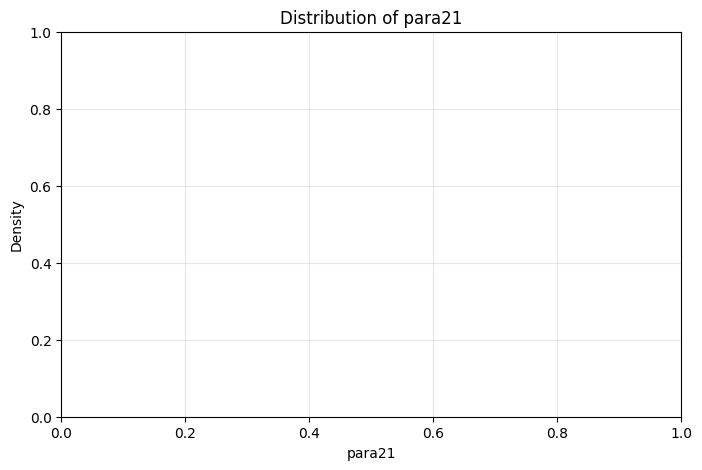

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


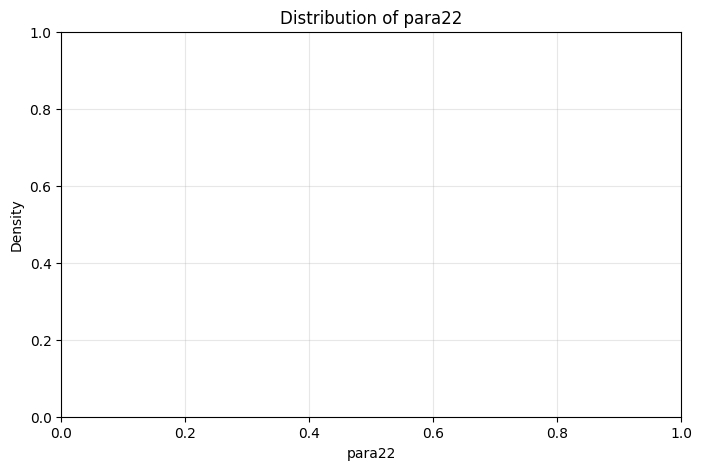

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


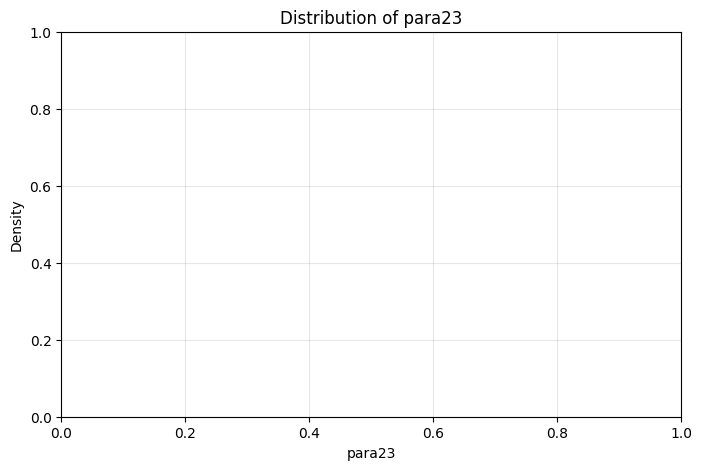

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


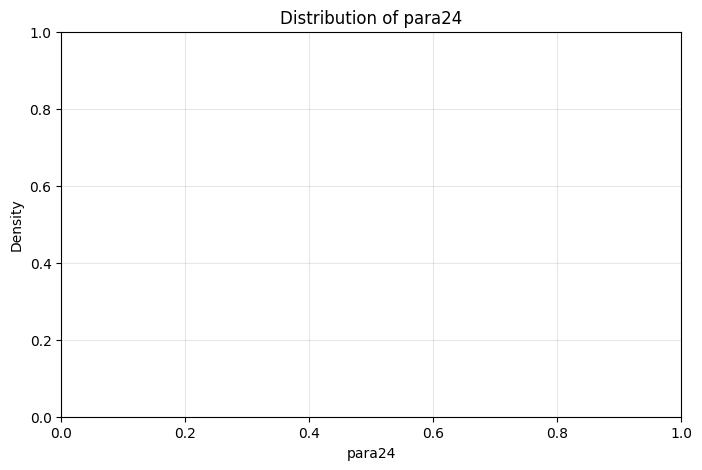

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


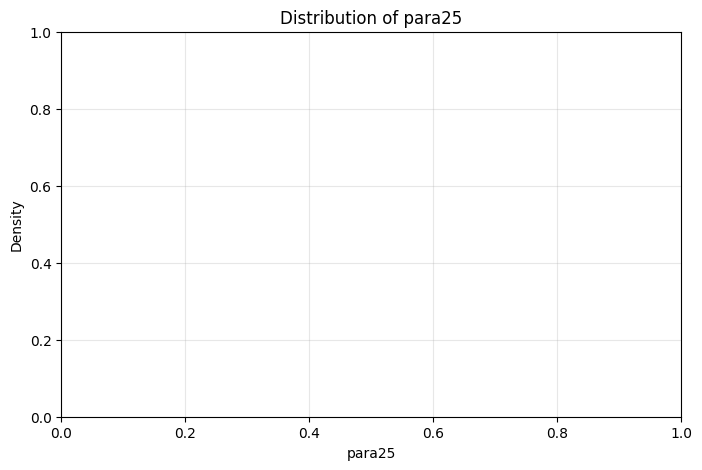

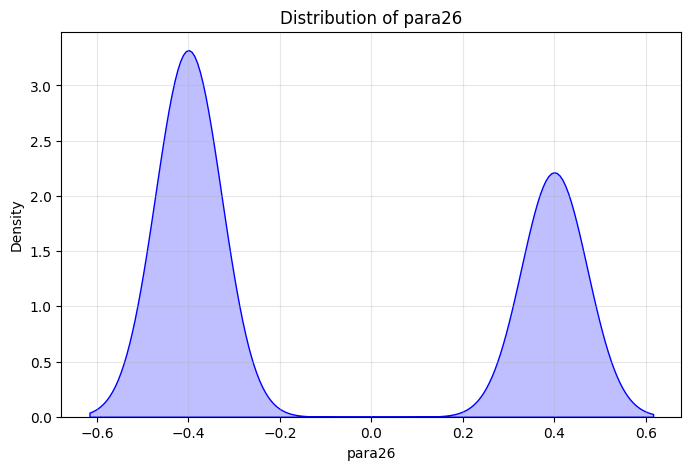

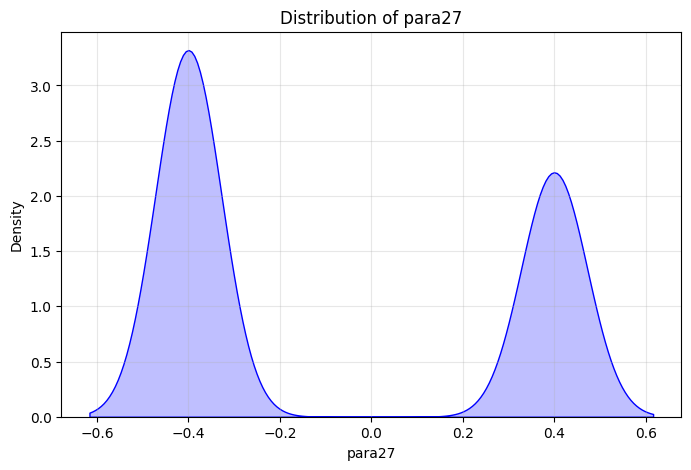

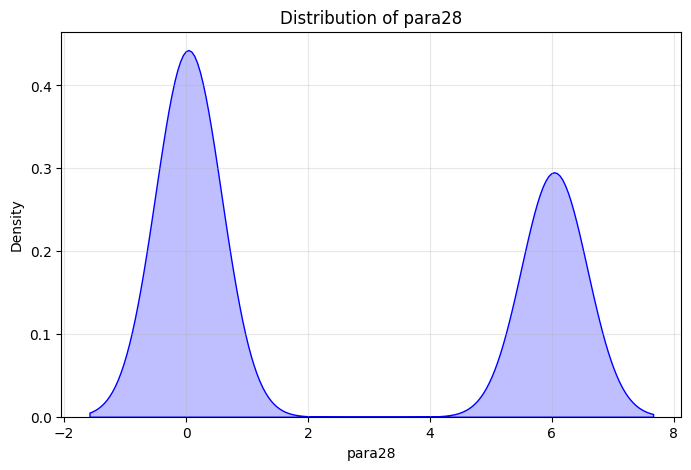

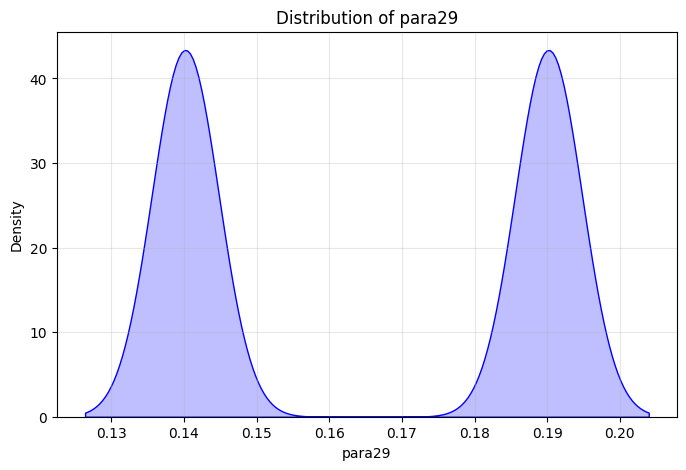

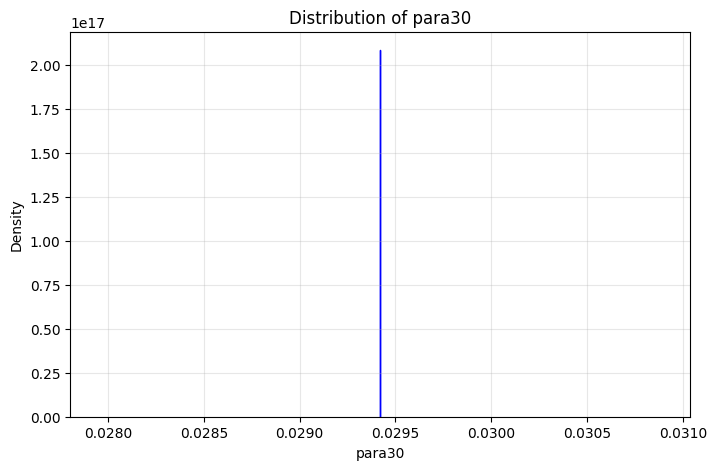

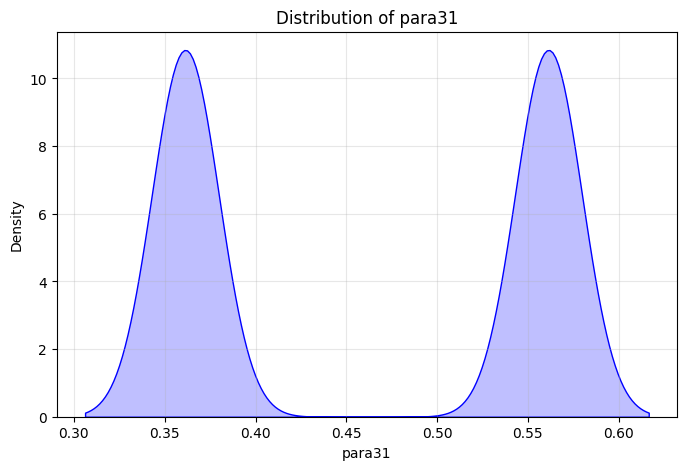

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


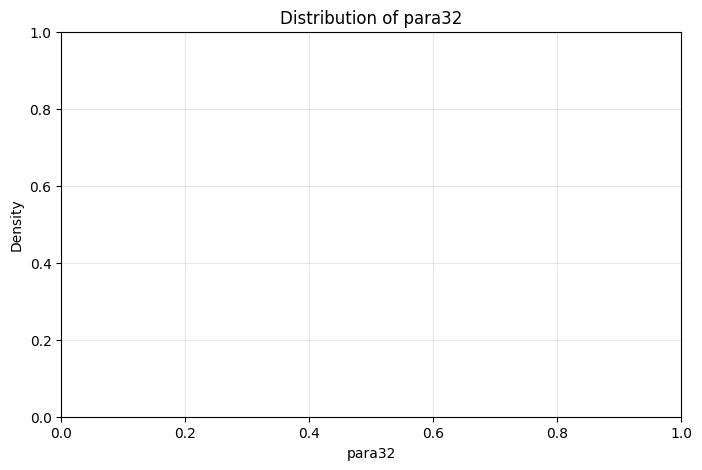

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


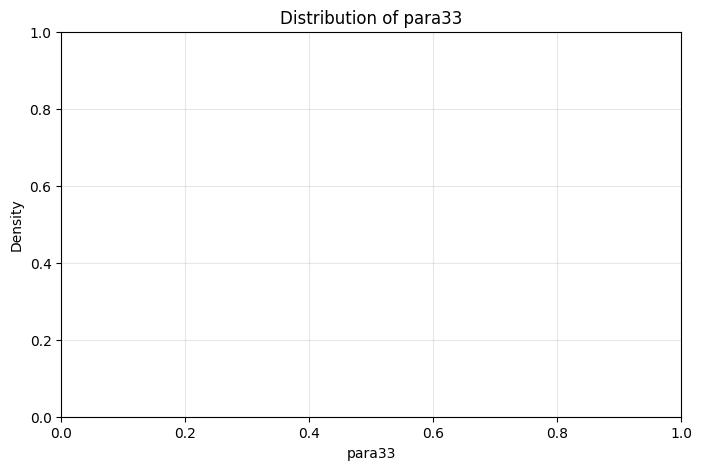

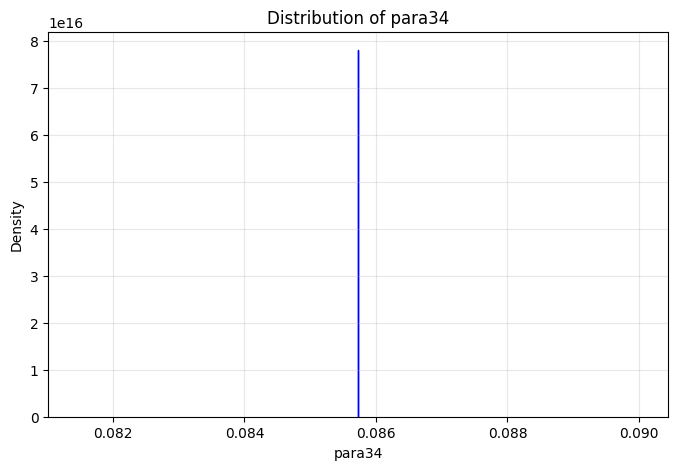

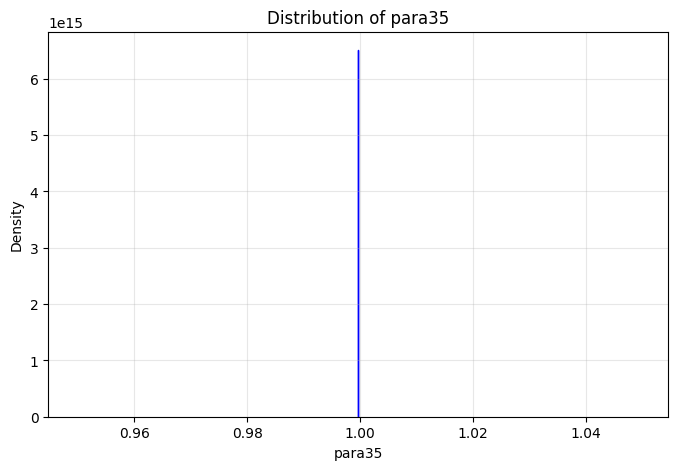

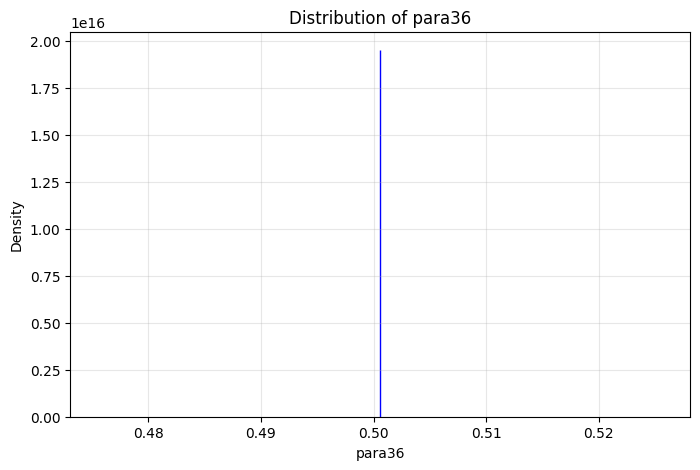

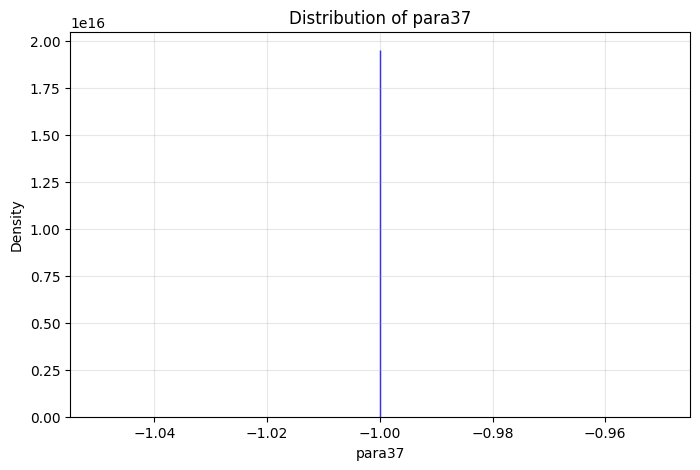

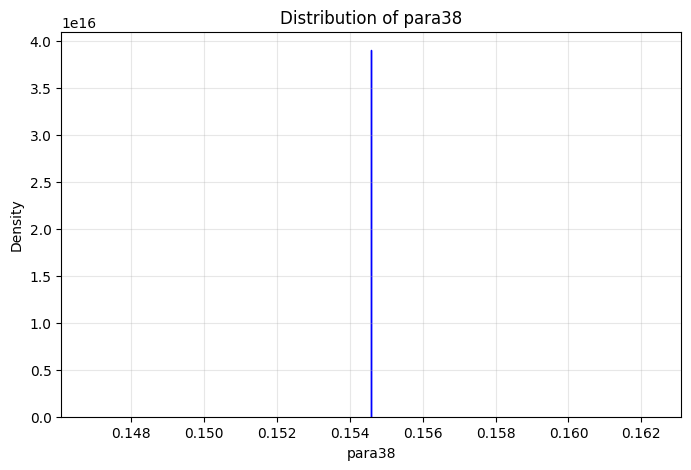

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


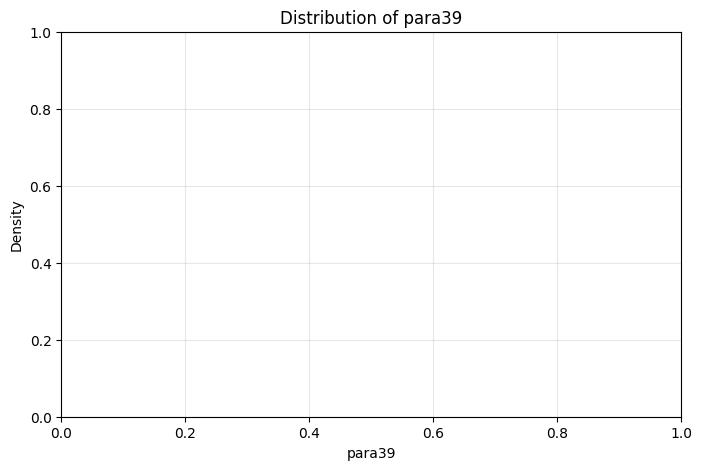

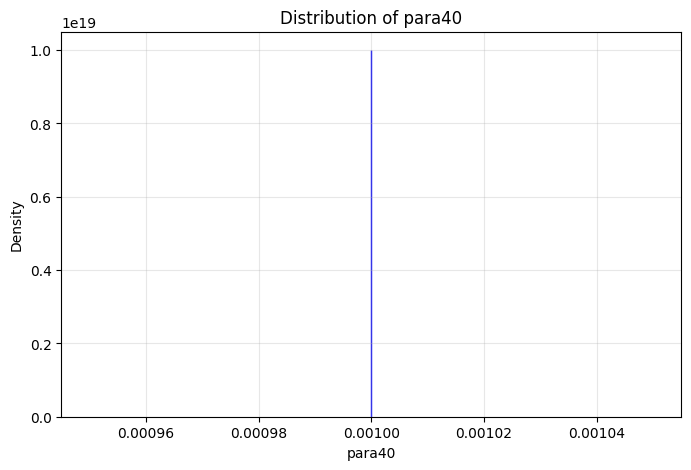

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


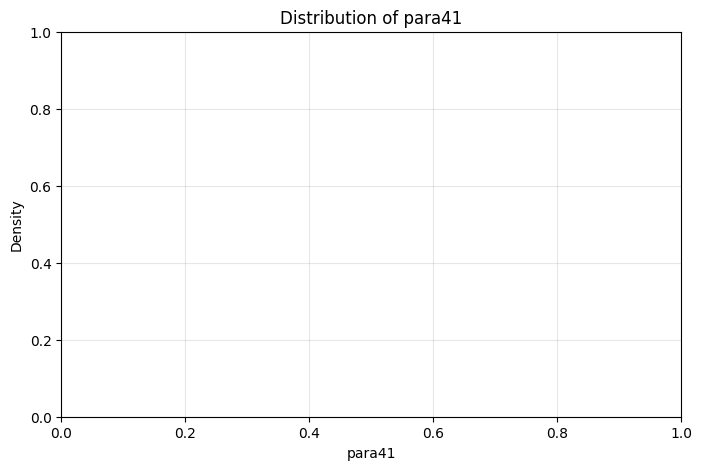

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


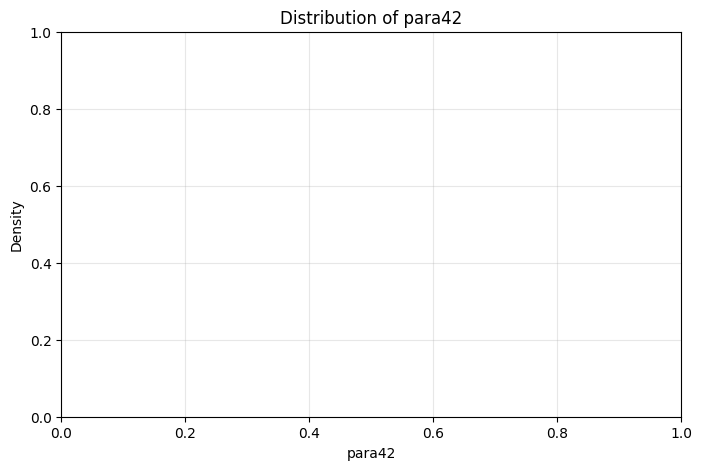

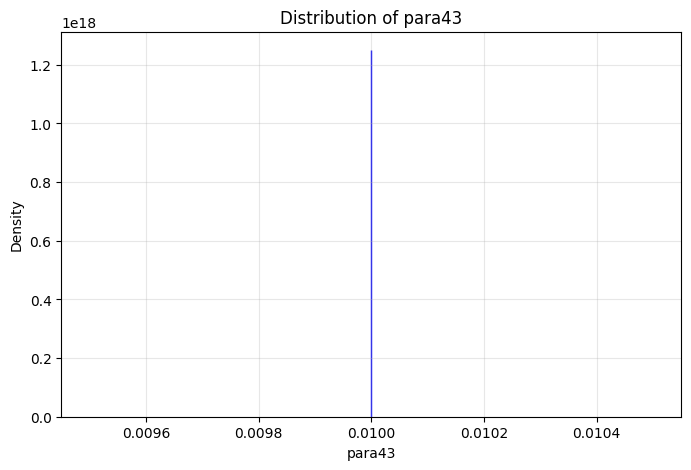

/tmp/ipython-input-32-1263599739.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(final_df[col], fill=True, color='blue')


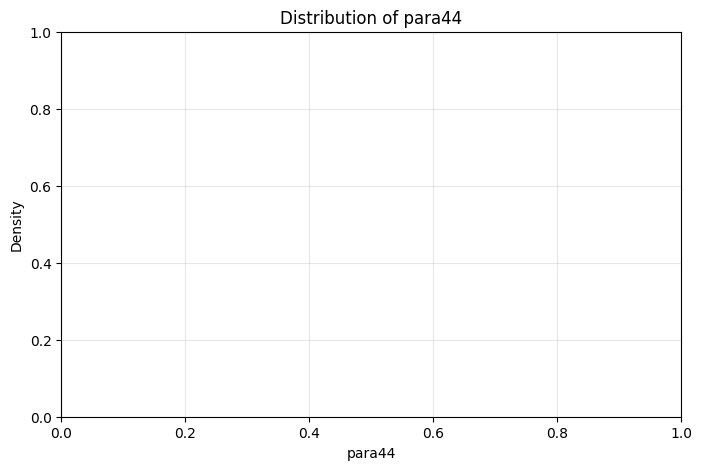

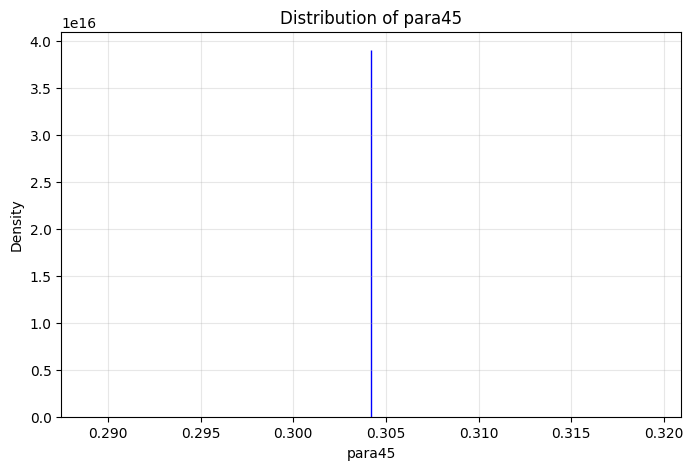

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric variable and plot distribution
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.kdeplot(final_df[col], fill=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    plt.show()


In [ ]:
final_df.to_csv('/content/drive/My Drive/ARIA/final_df.csv', index=False)

In [ ]:
from google.colab import drive
import pandas as pd

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Read CSV file into a dataframe
file_path = '/content/drive/My Drive/ARIA/final_df.csv'
final_df = pd.read_csv(file_path)

# ✅ Check the first few rows
final_df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hull_id,DragTotal(kN),Speed(kt),WaveH(m),Draft(m),Displacement(t),para1,para2,para3,para4,...,para36,para37,para38,para39,para40,para41,para42,para43,para44,para45
0,0,0.29,2.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
1,0,0.90,4.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
2,0,1.39,5.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
3,0,2.08,6.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4,0,3.09,7.0,0.06,0.984,39.229349,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,9,88.27,17.0,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4746,9,91.16,17.5,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4747,9,93.69,18.0,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4748,9,97.95,19.0,2.50,1.476,68.376914,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208


In [ ]:
final_df.to_csv("Final_Merged_Hull_Data.csv", index=False)
files.download("Final_Merged_Hull_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Make a copy so original data is preserved
final_df_normalised = final_df.copy()

# Apply the transformations
final_df_normalised['DragTotal(kN)'] = final_df_normalised['DragTotal(kN)'] / 100
final_df_normalised['Draft(m)'] = final_df_normalised['Draft(m)'] - 1
final_df_normalised['Speed(kt)'] = final_df_normalised['Speed(kt)'] / 20
final_df_normalised['Displacement(t)'] = final_df_normalised['Displacement(t)'] / 100

# ✅ Show first few rows to confirm
final_df_normalised


,Hull_id,DragTotal(kN),Speed(kt),WaveH(m),Draft(m),Displacement(t),para1,para2,para3,para4,...,para36,para37,para38,para39,para40,para41,para42,para43,para44,para45
0,0,0.0029,0.100,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
1,0,0.0090,0.200,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
2,0,0.0139,0.250,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
3,0,0.0208,0.300,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4,0,0.0309,0.350,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,9,0.8827,0.850,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4746,9,0.9116,0.875,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4747,9,0.9369,0.900,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4748,9,0.9795,0.950,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208


In [ ]:
final_df_normalised.to_csv('/content/drive/My Drive/ARIA/final_df_normalised.csv', index=False)

# LOAD FINAL_DF_NORMALISED HERE

In [ ]:
from google.colab import drive
import pandas as pd

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Read CSV file into a dataframe
file_path = '/content/drive/My Drive/ARIA/final_df_normalised.csv'
final_df_normalised = pd.read_csv(file_path)

# ✅ Check the first few rows
final_df_normalised

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hull_id,DragTotal(kN),Speed(kt),WaveH(m),Draft(m),Displacement(t),para1,para2,para3,para4,...,para36,para37,para38,para39,para40,para41,para42,para43,para44,para45
0,0,0.0029,0.100,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
1,0,0.0090,0.200,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
2,0,0.0139,0.250,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
3,0,0.0208,0.300,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4,0,0.0309,0.350,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,9,0.8827,0.850,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4746,9,0.9116,0.875,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4747,9,0.9369,0.900,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4748,9,0.9795,0.950,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208


In [ ]:
final_df_normalised['Hull_id'] = final_df_normalised['Hull_id'].apply(lambda x: f"{int(x):06d}")


In [ ]:
final_df_normalised

,Hull_id,DragTotal(kN),Speed(kt),WaveH(m),Draft(m),Displacement(t),para1,para2,para3,para4,...,para36,para37,para38,para39,para40,para41,para42,para43,para44,para45
0,000000,0.0029,0.100,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
1,000000,0.0090,0.200,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
2,000000,0.0139,0.250,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
3,000000,0.0208,0.300,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4,000000,0.0309,0.350,0.06,-0.016,0.392293,20.0,0.357161,0.255,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,000009,0.8827,0.850,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4746,000009,0.9116,0.875,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4747,000009,0.9369,0.900,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208
4748,000009,0.9795,0.950,2.50,0.476,0.683769,20.0,0.442161,0.345,0.225,...,0.500573,-0.999961,0.154592,0.867,0.001,0.38,0.5,0.01,0.0,0.304208


In [ ]:
# ---- STEP 1: Subset Y_train (Displacement(t), DragTotal(kN)) ----
Y_train = final_df_normalised[["Draft(m)", "DragTotal(kN)"]].to_numpy()
print(f"Y_train shape: {Y_train.shape}")  # Should be (4750, 2)

# ---- STEP 2: Subset X_train (Speed(kt), WaveH(m), Draft(m), para1-para45) ----
# Build the list of columns dynamically for para1 to para45
para_cols = [f"para{i}" for i in range(1, 46)]
X_columns = ["Speed(kt)", "WaveH(m)", "Displacement(t)"] + para_cols

X_train = final_df_normalised[X_columns].to_numpy()
print(f"X_train shape: {X_train.shape}")  # Should be (4750, 48)

# ---- STEP 3: Check first few rows (optional) ----
print("Y_train sample:")
print(Y_train[:5])

print("\nX_train sample:")
print(X_train[:5])


Y_train shape: (4750, 2)
X_train shape: (4750, 48)
Y_train sample:
[[-0.016   0.0029]
 [-0.016   0.009 ]
 [-0.016   0.0139]
 [-0.016   0.0208]
 [-0.016   0.0309]]

X_train sample:
[[ 1.00000000e-01  6.00000000e-02  3.92293489e-01  2.00000000e+01
   3.57161300e-01  2.55000000e-01  2.25000000e-01  1.20000000e-01
   9.49797200e-01  5.12500000e-01  1.65346400e-01  1.27500000e+01
   6.00000000e-02  3.00000000e-01  0.00000000e+00 -6.50000000e-01
   0.00000000e+00  5.50000000e-01 -2.05487300e+00  1.58440600e+00
   0.00000000e+00  2.00000000e-01  6.66911000e-04  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.00000000e-01  5.00000000e-02
   4.00000000e-01  4.00000000e-01  3.86733100e-02  1.90182600e-01
   2.94195500e-02  3.61337800e-01  0.00000000e+00  0.00000000e+00
   8.57290000e-02  9.99671700e-01  5.00572600e-01 -9.99961100e-01
   1.54592200e-01  8.67000000e-01  1.00000000e-03  3.80000000e-01
   5.00000000e-01  1.00000000e-02  0.00000000e+00  3.04208500e-01]
 [ 2.00000000e-01  6.000000

convert all numerical values to float

In [ ]:
X_train

array([[0.1       , 0.06      , 0.39229349, ..., 0.01      , 0.        ,
        0.3042085 ],
       [0.2       , 0.06      , 0.39229349, ..., 0.01      , 0.        ,
        0.3042085 ],
       [0.25      , 0.06      , 0.39229349, ..., 0.01      , 0.        ,
        0.3042085 ],
       ...,
       [0.9       , 2.5       , 0.68376914, ..., 0.01      , 0.        ,
        0.3042085 ],
       [0.95      , 2.5       , 0.68376914, ..., 0.01      , 0.        ,
        0.3042085 ],
       [1.        , 2.5       , 0.68376914, ..., 0.01      , 0.        ,
        0.3042085 ]])

In [ ]:
Y_train

array([[-0.016 ,  0.0029],
       [-0.016 ,  0.009 ],
       [-0.016 ,  0.0139],
       ...,
       [ 0.476 ,  0.9369],
       [ 0.476 ,  0.9795],
       [ 0.476 ,  1.0146]])

#Using tensorflow:

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5699 - mae: 0.5767 - val_loss: 0.0163 - val_mae: 0.0948
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0139 - mae: 0.0877 - val_loss: 0.0088 - val_mae: 0.0702
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0077 - mae: 0.0663 - val_loss: 0.0051 - val_mae: 0.0545
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043 - mae: 0.0499 - val_loss: 0.0030 - val_mae: 0.0416
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0028 - val_mae: 0.0422
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - mae: 0.0334 - val_loss: 0.0017 - val_mae: 0.0311
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - mae: 0.0281 - val_loss: 0.0012 - val_mae: 0.0273
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 8.9855e-04 - val_mae: 0.0232
Epoch 9/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s

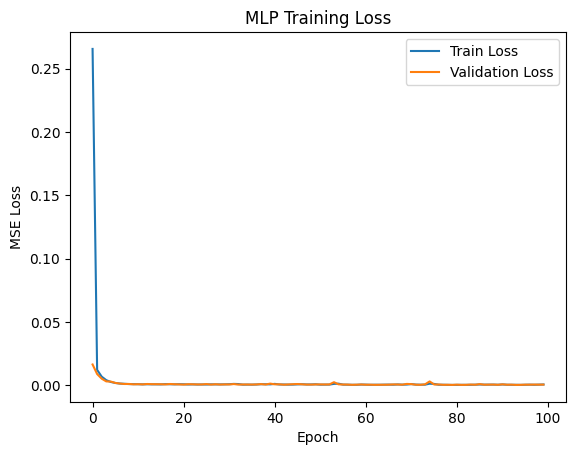

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
True values:
 [[-0.016   0.4624]
 [ 0.1892  0.4129]
 [ 0.3241  0.4264]
 [ 0.1513  0.3931]
 [ 0.3282  0.7205]]
Predicted values:
 [[-0.01438555  0.4600007 ]
 [ 0.19274488  0.4219457 ]
 [ 0.32595128  0.42558265]
 [ 0.15285768  0.3925736 ]
 [ 0.3313857   0.74331075]]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ---- STEP 1: Normalize X_train and Y_train ----

# StandardScaler: zero mean, unit variance
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X_train)
Y_scaled = y_scaler.fit_transform(Y_train)

# Split into train/test sets (optional, here 80/20)
X_train_split, X_test, Y_train_split, Y_test = train_test_split(
    X_scaled, Y_scaled, test_size=0.2, random_state=42
)

# ---- STEP 2: Build MLP model ----

# Input: 48 features, Output: 2 targets
model = keras.Sequential([
    layers.Input(shape=(48,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)  # 2 outputs, no activation for regression
])

# Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error as extra metric
)

# ---- STEP 3: Train model ----
history = model.fit(
    X_train_split, Y_train_split,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# ---- STEP 4: Plot training history ----
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# ---- STEP 5: Predict and inverse scale ----
Y_pred_scaled = model.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred_scaled)
Y_test_orig = y_scaler.inverse_transform(Y_test)

# Compare predicted vs true for first 5 samples
print("True values:\n", Y_test_orig[:5])
print("Predicted values:\n", Y_pred[:5])


In [ ]:
!pip install jaxopt
!pip install evojax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 10.7 MB/s eta 0:00:00


#Using Jax

In [ ]:
import jax
import optax
import jaxopt
from flax import linen as nn
from jax import lax, random, numpy as jnp
from jax import random, grad, vmap, hessian, jacfwd, jit
from evojax.util import get_params_format_fn

import os
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## choose which GPU to use
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
jax.devices()

[CpuDevice(id=0)]

MLP definition

In [ ]:
import jax
import jax.numpy as jnp
from flax import linen as nn

# New MLP class
class MLP(nn.Module):
    @nn.compact
    def __call__(self, inputs):
        kinit = jax.nn.initializers.he_uniform()

        # Split inputs: first 3 are Speed, WaveH, Displacement; rest are 45 parameters
        Speed, WaveH, Disp, Params = jnp.split(inputs, [1,2,3], axis=-1)

        # Operating condition mapping (3 inputs)
        Opc = jnp.hstack([Speed, WaveH, Disp])
        Opc = nn.Dense(64, kernel_init=kinit)(Opc)
        Opc = jnp.tanh(Opc)
        Opc = nn.Dense(128, kernel_init=kinit)(Opc)
        Opc = jnp.tanh(Opc)

        # Parameter mapping (45 inputs)
        Params = nn.Dense(256, kernel_init=kinit)(Params)
        Params = jnp.tanh(Params)
        Params = nn.Dense(128, kernel_init=kinit)(Params)
        Params = jnp.tanh(Params)

        # Merge both branches
        merged = jnp.hstack([Opc, Params])
        merged = nn.Dense(128, kernel_init=kinit)(merged)
        merged = jnp.tanh(merged)
        merged = nn.Dense(128, kernel_init=kinit)(merged)
        merged = jnp.tanh(merged)

        # Output layer (2 outputs: Draft, DragTotal)
        out = nn.Dense(2, kernel_init=kinit, use_bias=True)(merged)
        return out


In [ ]:
import optax
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assume you have final_df_normalised loaded
X = final_df_normalised[['Speed(kt)', 'WaveH(m)', 'Displacement(t)'] + [f'para{i}' for i in range(1,46)]].values
Y = final_df_normalised[['Draft(m)', 'DragTotal(kN)']].values

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize model and parameters
model = MLP()
key = jax.random.PRNGKey(0)
params = model.init(key, jnp.ones((1, 48)))  # 48 input features

# Define optimizer
optimizer = optax.adam(learning_rate=1e-3)
opt_state = optimizer.init(params)

# Loss function (MSE)
def loss_fn(params, x, y):
    preds = model.apply(params, x)
    return jnp.mean((preds - y)**2)

@jax.jit
def train_step(params, opt_state, x, y):
    loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss

# Training loop
batch_size = 64
epochs = 200

for epoch in range(epochs):
    # Shuffle batch indices
    idx = np.random.permutation(len(X_train))
    X_train_shuffled, Y_train_shuffled = X_train[idx], Y_train[idx]

    # Mini-batch training
    for i in range(0, len(X_train), batch_size):
        xb = jnp.array(X_train_shuffled[i:i+batch_size])
        yb = jnp.array(Y_train_shuffled[i:i+batch_size])
        params, opt_state, loss = train_step(params, opt_state, xb, yb)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}")

# Evaluate
y_pred = model.apply(params, jnp.array(X_test))
r2_draft = r2_score(Y_test[:,0], np.array(y_pred)[:,0])
r2_drag = r2_score(Y_test[:,1], np.array(y_pred)[:,1])
print("R2 Draft:", r2_draft)
print("R2 Drag:", r2_drag)


Epoch 0: Loss = 0.022622
Epoch 20: Loss = 0.000800
Epoch 40: Loss = 0.000098
Epoch 60: Loss = 0.000345
Epoch 80: Loss = 0.000301
Epoch 100: Loss = 0.000053
Epoch 120: Loss = 0.000084
Epoch 140: Loss = 0.000026
Epoch 160: Loss = 0.000028
Epoch 180: Loss = 0.000305
R2 Draft: 0.9991868188779769
R2 Drag: 0.9998971515648399


# Using Adam optimizer (Adaptive Moment Estimation) - learning rate is specififed
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 0: Loss = 0.121393
Epoch 20: Loss = 0.001039
Epoch 40: Loss = 0.000312
Epoch 60: Loss = 0.000610
Epoch 80: Loss = 0.000629
Epoch 100: Loss = 0.000068
Epoch 120: Loss = 0.000037
Epoch 140: Loss = 0.001306
Epoch 160: Loss = 0.000109
Epoch 180: Loss = 0.000587


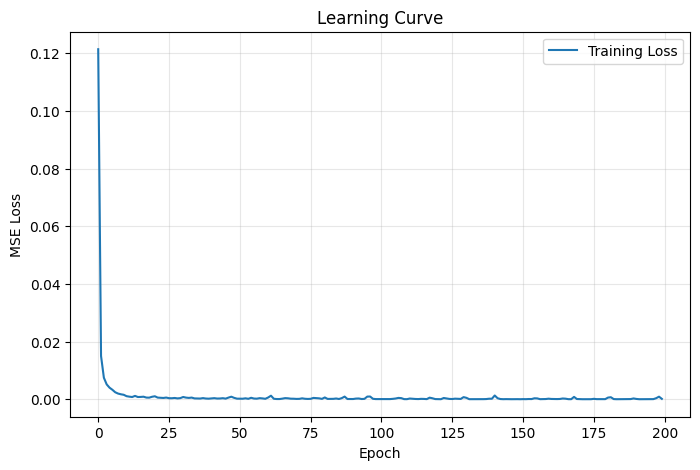

R2 Draft: 0.9973434220189559
R2 Drag: 0.9994811377667941
✅ Model parameters saved to: /content/drive/My Drive/ARIA/mlp_params.pkl


In [ ]:
import jax
import jax.numpy as jnp
from flax import linen as nn
import optax
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pickle
from google.colab import drive

# ✅ Mount Google Drive to save the model
drive.mount('/content/drive')

# ------------------------------
# 1️⃣ Prepare Data
# ------------------------------
X = final_df_normalised[['Speed(kt)', 'WaveH(m)', 'Displacement(t)'] + [f'para{i}' for i in range(1,46)]].values
Y = final_df_normalised[['Draft(m)', 'DragTotal(kN)']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ------------------------------
# 2️⃣ Define MLP Model
# ------------------------------
class MLP(nn.Module):
    @nn.compact
    def __call__(self, inputs):
        kinit = jax.nn.initializers.he_uniform()
        Speed, WaveH, Disp, Params = jnp.split(inputs, [1,2,3], axis=-1)

        Opc = jnp.hstack([Speed, WaveH, Disp])
        Opc = nn.Dense(64, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)
        Opc = nn.Dense(128, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)

        Params = nn.Dense(256, kernel_init=kinit)(Params); Params = jnp.tanh(Params)
        Params = nn.Dense(128, kernel_init=kinit)(Params); Params = jnp.tanh(Params)

        merged = jnp.hstack([Opc, Params])
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)

        out = nn.Dense(2, kernel_init=kinit, use_bias=True)(merged)
        return out

# ------------------------------
# 3️⃣ Initialize Model & Optimizer
# ------------------------------
model = MLP()
key = jax.random.PRNGKey(0)
params = model.init(key, jnp.ones((1, 48)))  # 48 features

optimizer = optax.adam(learning_rate=1e-3)
opt_state = optimizer.init(params)

# ------------------------------
# 4️⃣ Loss and Training Functions
# ------------------------------
def loss_fn(params, x, y):
    preds = model.apply(params, x)
    return jnp.mean((preds - y)**2)

@jax.jit
def train_step(params, opt_state, x, y):
    loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss

# ------------------------------
# 5️⃣ Training Loop
# ------------------------------
batch_size = 64
epochs = 200
loss_history = []

for epoch in range(epochs):
    idx = np.random.permutation(len(X_train))
    X_train_shuffled, Y_train_shuffled = X_train[idx], Y_train[idx]

    epoch_loss = 0
    for i in range(0, len(X_train), batch_size):
        xb = jnp.array(X_train_shuffled[i:i+batch_size])
        yb = jnp.array(Y_train_shuffled[i:i+batch_size])
        params, opt_state, loss = train_step(params, opt_state, xb, yb)
        epoch_loss += loss

    epoch_loss /= (len(X_train) / batch_size)
    loss_history.append(float(epoch_loss))

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {epoch_loss:.6f}")

# ------------------------------
# 6️⃣ Plot Learning Curve
# ------------------------------
plt.figure(figsize=(8,5))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Learning Curve")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# ------------------------------
# 7️⃣ Evaluate on Test Set
# ------------------------------
y_pred = model.apply(params, jnp.array(X_test))
r2_draft = r2_score(Y_test[:,0], np.array(y_pred)[:,0])
r2_drag = r2_score(Y_test[:,1], np.array(y_pred)[:,1])
print("R2 Draft:", r2_draft)
print("R2 Drag:", r2_drag)

# ------------------------------
# 8️⃣ Save Model Parameters
# ------------------------------
model_path = '/content/drive/My Drive/ARIA/mlp_params.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(params, f)
print(f"✅ Model parameters saved to: {model_path}")


# Using learning rate scheduler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 0: Loss = 0.112524
Epoch 20: Loss = 0.000427
Epoch 40: Loss = 0.000549
Epoch 60: Loss = 0.000287
Epoch 80: Loss = 0.000177
Epoch 100: Loss = 0.000636
Epoch 120: Loss = 0.000106
Epoch 140: Loss = 0.000028
Epoch 160: Loss = 0.000008
Epoch 180: Loss = 0.000005


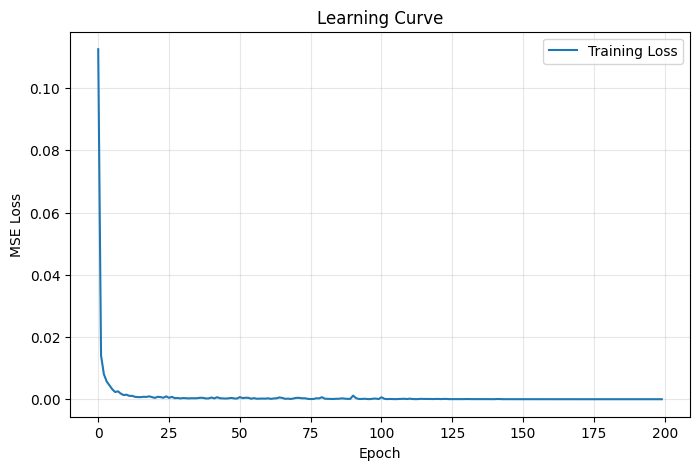

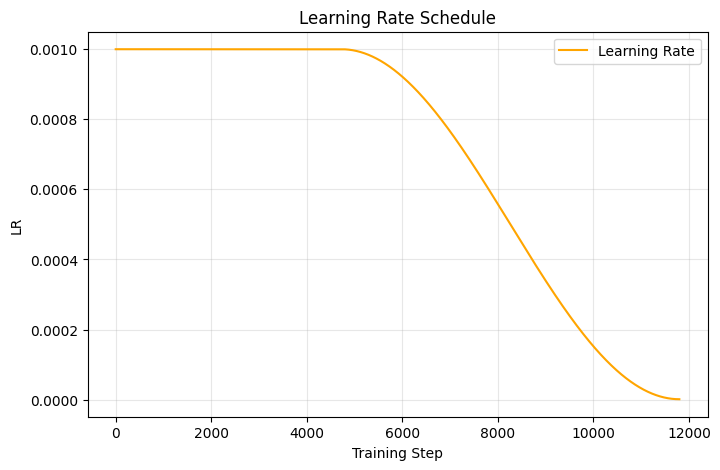

R2 Draft: 0.9999330919137591
R2 Drag: 0.9999325184123998
✅ Model with LR scheduler saved to: /content/drive/My Drive/ARIA/mlp_params_lr_sched.pkl


In [ ]:
import jax
import jax.numpy as jnp
from flax import linen as nn
import optax
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pickle
from google.colab import drive

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ------------------------------
# 1️⃣ Prepare Data
# ------------------------------
X = final_df_normalised[['Speed(kt)', 'WaveH(m)', 'Displacement(t)'] + [f'para{i}' for i in range(1,46)]].values
Y = final_df_normalised[['Draft(m)', 'DragTotal(kN)']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ------------------------------
# 2️⃣ Define MLP Model
# ------------------------------
class MLP(nn.Module):
    @nn.compact
    def __call__(self, inputs):
        kinit = jax.nn.initializers.he_uniform()
        Speed, WaveH, Disp, Params = jnp.split(inputs, [1,2,3], axis=-1)

        Opc = jnp.hstack([Speed, WaveH, Disp])
        Opc = nn.Dense(64, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)
        Opc = nn.Dense(128, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)

        Params = nn.Dense(256, kernel_init=kinit)(Params); Params = jnp.tanh(Params)
        Params = nn.Dense(128, kernel_init=kinit)(Params); Params = jnp.tanh(Params)

        merged = jnp.hstack([Opc, Params])
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)

        out = nn.Dense(2, kernel_init=kinit, use_bias=True)(merged)
        return out

# ------------------------------
# 3️⃣ Initialize Model & LR Scheduler
# ------------------------------
model = MLP()
key = jax.random.PRNGKey(0)
params = model.init(key, jnp.ones((1, 48)))  # 48 features

batch_size = 64
epochs = 200
steps_per_epoch = len(X_train) // batch_size
max_iter = epochs * steps_per_epoch
learning_rate = 1e-3

# Warmup + cosine decay schedule
lr_scheduler = optax.warmup_cosine_decay_schedule(
    init_value=learning_rate,
    peak_value=learning_rate,
    warmup_steps=int(max_iter * 0.4),
    decay_steps=max_iter,
    end_value=1e-6
)

# Adam optimizer with scheduler
optimizer = optax.adam(learning_rate=lr_scheduler)
opt_state = optimizer.init(params)

# ------------------------------
# 4️⃣ Loss and Training Functions
# ------------------------------
def loss_fn(params, x, y):
    preds = model.apply(params, x)
    return jnp.mean((preds - y)**2)

@jax.jit
def train_step(params, opt_state, x, y):
    loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss

# ------------------------------
# 5️⃣ Training Loop
# ------------------------------
loss_history = []

for epoch in range(epochs):
    idx = np.random.permutation(len(X_train))
    X_train_shuffled, Y_train_shuffled = X_train[idx], Y_train[idx]

    epoch_loss = 0
    for i in range(0, len(X_train), batch_size):
        xb = jnp.array(X_train_shuffled[i:i+batch_size])
        yb = jnp.array(Y_train_shuffled[i:i+batch_size])
        params, opt_state, loss = train_step(params, opt_state, xb, yb)
        epoch_loss += loss

    epoch_loss /= steps_per_epoch
    loss_history.append(float(epoch_loss))

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {epoch_loss:.6f}")

# ------------------------------
# 6️⃣ Plot Learning Curve
# ------------------------------
plt.figure(figsize=(8,5))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Learning Curve")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# ------------------------------
# 7️⃣ Plot Learning Rate Schedule
# ------------------------------
lr_values = [lr_scheduler(i) for i in range(max_iter)]
plt.figure(figsize=(8,5))
plt.plot(lr_values, color='orange', label="Learning Rate")
plt.xlabel("Training Step")
plt.ylabel("LR")
plt.title("Learning Rate Schedule")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# ------------------------------
# 8️⃣ Evaluate Model
# ------------------------------
y_pred = model.apply(params, jnp.array(X_test))
r2_draft = r2_score(Y_test[:,0], np.array(y_pred)[:,0])
r2_drag = r2_score(Y_test[:,1], np.array(y_pred)[:,1])
print("R2 Draft:", r2_draft)
print("R2 Drag:", r2_drag)

# ------------------------------
# 9️⃣ Save Model Parameters
# ------------------------------
model_path = '/content/drive/My Drive/ARIA/mlp_params_lr_sched.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(params, f)
print(f"✅ Model with LR scheduler saved to: {model_path}")


#  adam optimizer + learning rate scheduler

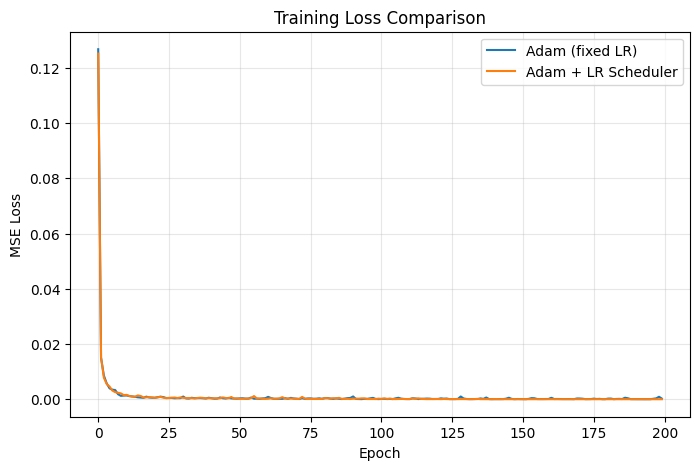

Adam (Fixed LR): R2 Draft = 0.9969783185447878 | R2 Drag = 0.9985459023801649
Adam + LR Scheduler: R2 Draft = 0.9999191964961005 | R2 Drag = 0.999927277586178


In [ ]:
import copy

# ✅ Keep same train/test split
X = final_df_normalised[['Speed(kt)', 'WaveH(m)', 'Displacement(t)'] + [f'para{i}' for i in range(1,46)]].values
Y = final_df_normalised[['Draft(m)', 'DragTotal(kN)']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# --------------------------------
# Common model definition
# --------------------------------
class MLP(nn.Module):
    @nn.compact
    def __call__(self, inputs):
        kinit = jax.nn.initializers.he_uniform()
        Speed, WaveH, Disp, Params = jnp.split(inputs, [1,2,3], axis=-1)

        Opc = jnp.hstack([Speed, WaveH, Disp])
        Opc = nn.Dense(64, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)
        Opc = nn.Dense(128, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)

        Params = nn.Dense(256, kernel_init=kinit)(Params); Params = jnp.tanh(Params)
        Params = nn.Dense(128, kernel_init=kinit)(Params); Params = jnp.tanh(Params)

        merged = jnp.hstack([Opc, Params])
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)

        out = nn.Dense(2, kernel_init=kinit)(merged)
        return out

# --------------------------------
# Training function
# --------------------------------
def train_model(optimizer, params_init, epochs=200, batch_size=64):
    opt_state = optimizer.init(params_init)
    params = copy.deepcopy(params_init)
    steps_per_epoch = len(X_train) // batch_size
    loss_history = []

    @jax.jit
    def train_step(params, opt_state, x, y):
        loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
        updates, opt_state = optimizer.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss

    for epoch in range(epochs):
        idx = np.random.permutation(len(X_train))
        Xs, Ys = X_train[idx], Y_train[idx]

        epoch_loss = 0
        for i in range(0, len(Xs), batch_size):
            xb = jnp.array(Xs[i:i+batch_size])
            yb = jnp.array(Ys[i:i+batch_size])
            params, opt_state, loss = train_step(params, opt_state, xb, yb)
            epoch_loss += loss
        epoch_loss /= steps_per_epoch
        loss_history.append(float(epoch_loss))
    return params, loss_history

# Loss function
def loss_fn(params, x, y):
    preds = model.apply(params, x)
    return jnp.mean((preds - y)**2)

# --------------------------------
# Initialize model and params
# --------------------------------
model = MLP()
key = jax.random.PRNGKey(0)
params_init = model.init(key, jnp.ones((1, 48)))

# --------------------------------
# 1️⃣ Train Adam Fixed LR
# --------------------------------
adam_optimizer = optax.adam(learning_rate=1e-3)
params_adam, loss_history_adam = train_model(adam_optimizer, params_init)

# --------------------------------
# 2️⃣ Train Adam + LR Scheduler
# --------------------------------
batch_size = 64
epochs = 200
steps_per_epoch = len(X_train) // batch_size
max_iter = epochs * steps_per_epoch
lr_scheduler = optax.warmup_cosine_decay_schedule(
    init_value=1e-3, peak_value=1e-3,
    warmup_steps=int(max_iter*0.4), decay_steps=max_iter, end_value=1e-6
)
adam_sched_optimizer = optax.adam(learning_rate=lr_scheduler)
params_sched, loss_history_sched = train_model(adam_sched_optimizer, params_init)

# --------------------------------
# Compare Training Loss Curves
# --------------------------------
plt.figure(figsize=(8,5))
plt.plot(loss_history_adam, label="Adam (fixed LR)")
plt.plot(loss_history_sched, label="Adam + LR Scheduler")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --------------------------------
# Evaluate Both Models
# --------------------------------
y_pred_adam = model.apply(params_adam, jnp.array(X_test))
y_pred_sched = model.apply(params_sched, jnp.array(X_test))

r2_draft_adam = r2_score(Y_test[:,0], np.array(y_pred_adam)[:,0])
r2_drag_adam = r2_score(Y_test[:,1], np.array(y_pred_adam)[:,1])

r2_draft_sched = r2_score(Y_test[:,0], np.array(y_pred_sched)[:,0])
r2_drag_sched = r2_score(Y_test[:,1], np.array(y_pred_sched)[:,1])

print("Adam (Fixed LR): R2 Draft =", r2_draft_adam, "| R2 Drag =", r2_drag_adam)
print("Adam + LR Scheduler: R2 Draft =", r2_draft_sched, "| R2 Drag =", r2_drag_sched)


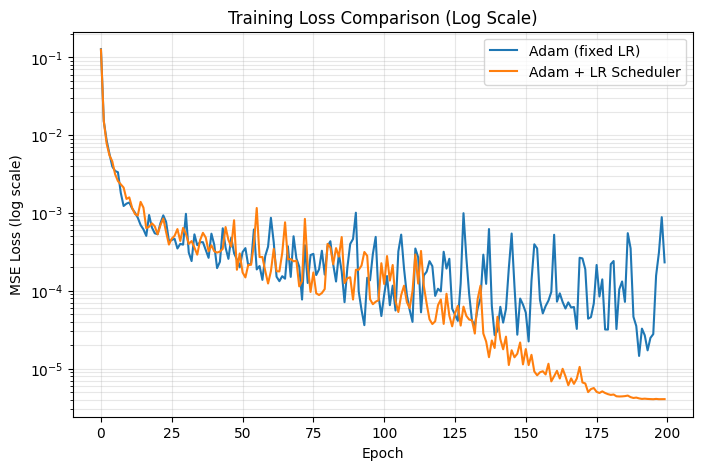

In [ ]:
# --------------------------------
# Compare Training Loss Curves (Log Scale)
# --------------------------------
plt.figure(figsize=(8,5))
plt.plot(loss_history_adam, label="Adam (fixed LR)")
plt.plot(loss_history_sched, label="Adam + LR Scheduler")
plt.yscale('log')  # ✅ Logarithmic scale for loss
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (log scale)")
plt.title("Training Loss Comparison (Log Scale)")
plt.legend()
plt.grid(True, which='both', alpha=0.3)
plt.show()


In [ ]:
y_pred_adam = model.apply(params_adam, jnp.array(X_test))
y_pred_sched = model.apply(params_sched, jnp.array(X_test))

r2_draft_adam = r2_score(Y_test[:,0], np.array(y_pred_adam)[:,0])
r2_drag_adam = r2_score(Y_test[:,1], np.array(y_pred_adam)[:,1])

r2_draft_sched = r2_score(Y_test[:,0], np.array(y_pred_sched)[:,0])
r2_drag_sched = r2_score(Y_test[:,1], np.array(y_pred_sched)[:,1])

print("Adam (Fixed LR): R2 Draft =", r2_draft_adam, "R2 Drag =", r2_drag_adam)
print("Adam + LR Scheduler: R2 Draft =", r2_draft_sched, "R2 Drag =", r2_drag_sched)


Adam (Fixed LR): R2 Draft = 0.9969783185447878 R2 Drag = 0.9985459023801649
Adam + LR Scheduler: R2 Draft = 0.9999191964961005 R2 Drag = 0.999927277586178


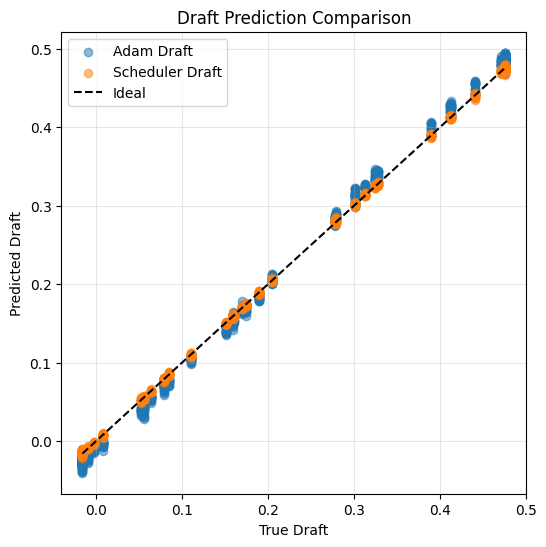

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test[:,0], y_pred_adam[:,0], alpha=0.5, label="Adam Draft")
plt.scatter(Y_test[:,0], y_pred_sched[:,0], alpha=0.5, label="Scheduler Draft")
plt.plot([Y_test[:,0].min(), Y_test[:,0].max()],
         [Y_test[:,0].min(), Y_test[:,0].max()],
         'k--', label="Ideal")
plt.xlabel("True Draft")
plt.ylabel("Predicted Draft")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("Draft Prediction Comparison")
plt.show()


In [ ]:
'''
import jax.random as random

# Create dummy input: batch_size=10, T+Fn=2 features, Param=45 features (total 47)
x = jnp.ones((10, 47))

# Initialize the model
model = MLP()
key = random.PRNGKey(0)
params = model.init(key, x)

# Apply the model
y = model.apply(params, x)
print(y.shape)  # (10, 1)
'''

(10, 1)


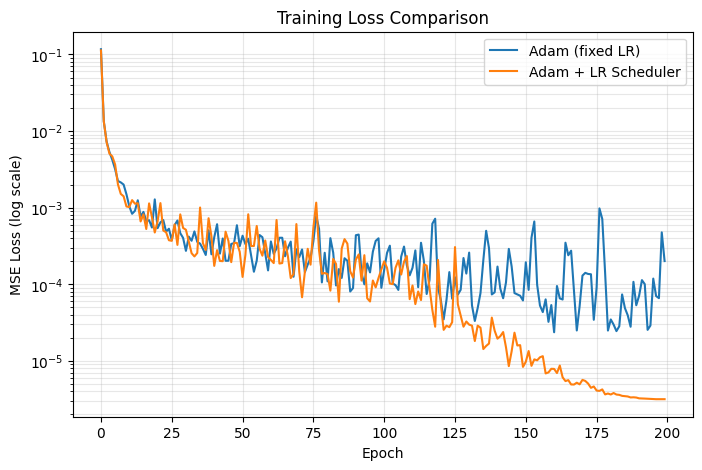

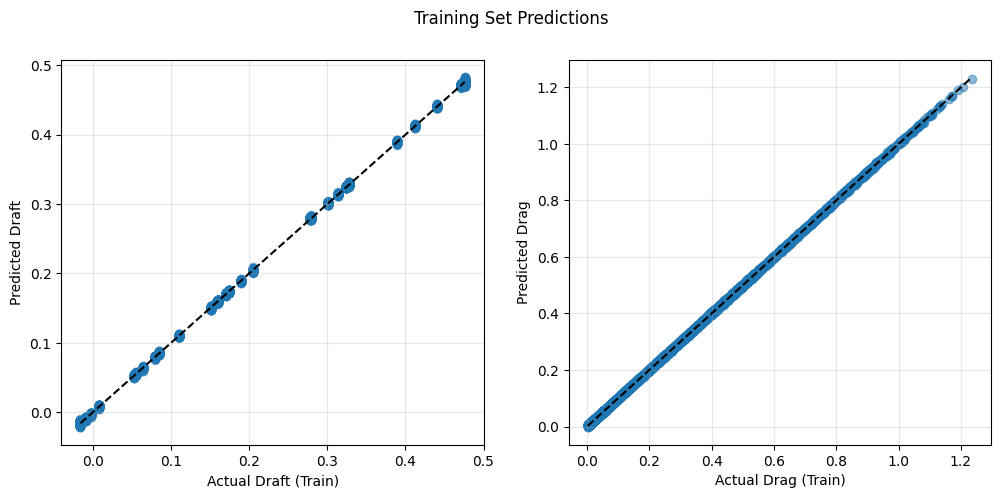

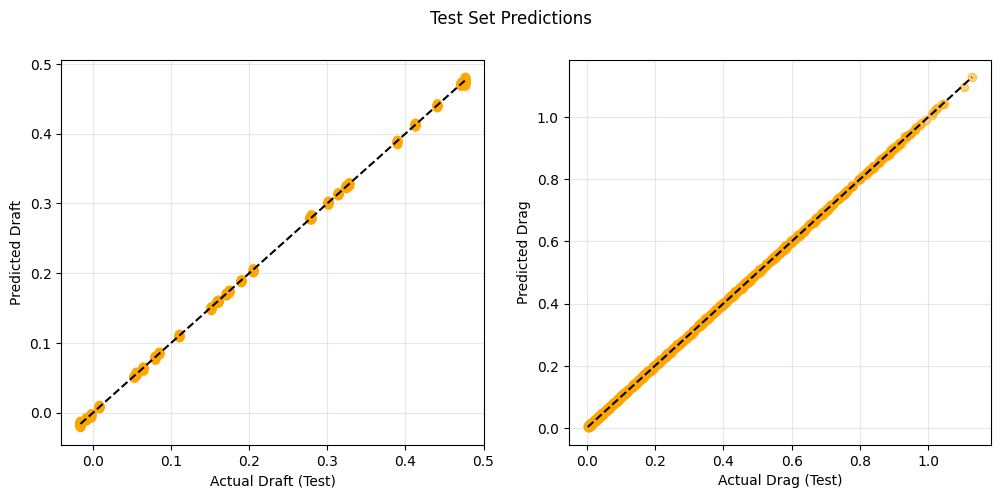

In [ ]:
import jax
import jax.numpy as jnp
from flax import linen as nn
import optax
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# --------------------------------
# 1️⃣ Prepare Data (80/20 split)
# --------------------------------
X = final_df_normalised[['Speed(kt)', 'WaveH(m)', 'Displacement(t)'] + [f'para{i}' for i in range(1,46)]].values
Y = final_df_normalised[['Draft(m)', 'DragTotal(kN)']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# --------------------------------
# 2️⃣ Define MLP Model
# --------------------------------
class MLP(nn.Module):
    @nn.compact
    def __call__(self, inputs):
        kinit = jax.nn.initializers.he_uniform()
        Speed, WaveH, Disp, Params = jnp.split(inputs, [1,2,3], axis=-1)

        Opc = jnp.hstack([Speed, WaveH, Disp])
        Opc = nn.Dense(64, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)
        Opc = nn.Dense(128, kernel_init=kinit)(Opc); Opc = jnp.tanh(Opc)

        Params = nn.Dense(256, kernel_init=kinit)(Params); Params = jnp.tanh(Params)
        Params = nn.Dense(128, kernel_init=kinit)(Params); Params = jnp.tanh(Params)

        merged = jnp.hstack([Opc, Params])
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)
        merged = nn.Dense(128, kernel_init=kinit)(merged); merged = jnp.tanh(merged)

        out = nn.Dense(2, kernel_init=kinit)(merged)
        return out

# --------------------------------
# 3️⃣ Training Function
# --------------------------------
def train_model(optimizer, params_init, X_train, Y_train, epochs=200, batch_size=64):
    params = params_init
    opt_state = optimizer.init(params)
    steps_per_epoch = len(X_train) // batch_size
    loss_history = []

    @jax.jit
    def loss_fn(params, x, y):
        preds = model.apply(params, x)
        return jnp.mean((preds - y)**2)

    @jax.jit
    def train_step(params, opt_state, x, y):
        loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
        updates, opt_state = optimizer.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss

    for epoch in range(epochs):
        idx = np.random.permutation(len(X_train))
        Xs, Ys = X_train[idx], Y_train[idx]

        epoch_loss = 0
        for i in range(0, len(Xs), batch_size):
            xb = jnp.array(Xs[i:i+batch_size])
            yb = jnp.array(Ys[i:i+batch_size])
            params, opt_state, loss = train_step(params, opt_state, xb, yb)
            epoch_loss += loss
        epoch_loss /= steps_per_epoch
        loss_history.append(float(epoch_loss))
    return params, loss_history

# --------------------------------
# 4️⃣ Initialize Model and Params
# --------------------------------
model = MLP()
key = jax.random.PRNGKey(0)
params_init = model.init(key, jnp.ones((1, 48)))

# Adam Fixed LR
adam_optimizer = optax.adam(learning_rate=1e-3)
params_adam, loss_history_adam = train_model(adam_optimizer, params_init, X_train, Y_train)

# Adam + LR Scheduler
batch_size = 64
epochs = 200
steps_per_epoch = len(X_train) // batch_size
max_iter = epochs * steps_per_epoch
lr_scheduler = optax.warmup_cosine_decay_schedule(
    init_value=1e-3, peak_value=1e-3,
    warmup_steps=int(max_iter*0.4), decay_steps=max_iter, end_value=1e-6
)
adam_sched_optimizer = optax.adam(learning_rate=lr_scheduler)
params_sched, loss_history_sched = train_model(adam_sched_optimizer, params_init, X_train, Y_train)

# --------------------------------
# 5️⃣ Plot Training Loss (Log Scale)
# --------------------------------
plt.figure(figsize=(8,5))
plt.plot(loss_history_adam, label="Adam (fixed LR)")
plt.plot(loss_history_sched, label="Adam + LR Scheduler")
plt.yscale('log')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (log scale)")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True, which='both', alpha=0.3)
plt.show()

# --------------------------------
# 6️⃣ Predict on Training and Test Sets
# --------------------------------
y_train_pred = model.apply(params_sched, jnp.array(X_train))
y_test_pred = model.apply(params_sched, jnp.array(X_test))

# --------------------------------
# 7️⃣ Plot Actual vs Predicted (Training)
# --------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(Y_train[:,0], np.array(y_train_pred)[:,0], alpha=0.5)
plt.plot([Y_train[:,0].min(), Y_train[:,0].max()],
         [Y_train[:,0].min(), Y_train[:,0].max()], 'k--')
plt.xlabel("Actual Draft (Train)")
plt.ylabel("Predicted Draft")
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.scatter(Y_train[:,1], np.array(y_train_pred)[:,1], alpha=0.5)
plt.plot([Y_train[:,1].min(), Y_train[:,1].max()],
         [Y_train[:,1].min(), Y_train[:,1].max()], 'k--')
plt.xlabel("Actual Drag (Train)")
plt.ylabel("Predicted Drag")
plt.grid(True, alpha=0.3)
plt.suptitle("Training Set Predictions")
plt.show()

# --------------------------------
# 8️⃣ Plot Actual vs Predicted (Test)
# --------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(Y_test[:,0], np.array(y_test_pred)[:,0], alpha=0.5, color='orange')
plt.plot([Y_test[:,0].min(), Y_test[:,0].max()],
         [Y_test[:,0].min(), Y_test[:,0].max()], 'k--')
plt.xlabel("Actual Draft (Test)")
plt.ylabel("Predicted Draft")
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.scatter(Y_test[:,1], np.array(y_test_pred)[:,1], alpha=0.5, color='orange')
plt.plot([Y_test[:,1].min(), Y_test[:,1].max()],
         [Y_test[:,1].min(), Y_test[:,1].max()], 'k--')
plt.xlabel("Actual Drag (Test)")
plt.ylabel("Predicted Drag")
plt.grid(True, alpha=0.3)
plt.suptitle("Test Set Predictions")
plt.show()
